# Biogas Data Preprocessing and Analysis

# Pre_Processing

### 1.1 Data Input

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import pandas as pd

In [12]:
df= pd.read_csv('biogas_2014_2016.csv',parse_dates=True,index_col=0,)#
index_list = list(df.index)
df.head()

DS_PS_in(%)  VS_PS_in(%)  DS_WS_in(%)  VS_WS_in(%)  \
Date                                                             
2014-01-01        4.515          NaN        6.435          NaN   
2014-01-02        9.405        38.49        6.315        76.97   
2014-01-03        6.090          NaN        6.255          NaN   
2014-01-04        9.375          NaN        6.405          NaN   
2014-01-05        6.210        69.12        6.510        76.26   

            DS_Digester(%)  DS_eff(%)  VS_eff(%)  ALK(mg CaCO3/L)  FA(mg/L)  \
Date                                                                          
2014-01-01           3.720      3.800      55.30              NaN       NaN   
2014-01-02           3.748      3.690      56.29              NaN       NaN   
2014-01-03           3.796      3.750      56.21              NaN       NaN   
2014-01-04           3.834      3.800      55.16          17740.0    1320.0   
2014-01-05           3.832      3.825      55.02              NaN       NaN   

               pH  T(°C)  Q_PS/Q_WS  Q_PS_in(m³/d)  Q_WS_in(m³/d)  \
Date                                                                
2014-01-01  7.252  40.36   1.239669         1080.0          871.2   
2014-01-02  7.260  40.36   1.278409         1080.0          844.8   
2014-01-03  7.262  40.36   1.363636         1080.0          792.0   
2014-01-04  7.254  40.36   1.203209         1080.0          897.6   
2014-01-05  7.252  40.28   1.176471         1056.0          897.6   

            Q_Total(m³/d)  Q_eff(m³/d)  Q_Biogas(Nm³/d)  
Date                                                     
2014-01-01         1951.2       1488.0          66480.0  
2014-01-02         1924.8       1440.0          67272.0  
2014-01-03         1872.0       1416.0          69000.0  
2014-01-04         1977.6       1560.0          65544.0  
2014-01-05         1953.6       1536.0          63360.0

### 1.2 Show Missing Values

In [4]:
#Show Missing values for each Feature
df.isnull().sum()

DS_PS_in(%)         36
VS_PS_in(%)        442
DS_WS_in(%)         31
VS_WS_in(%)        290
DS_Digester(%)     474
DS_eff(%)           41
VS_eff(%)           40
ALK(mg CaCO3/L)    794
FA(mg/L)           794
pH                  95
T(°C)              107
Q_PS/Q_WS           27
Q_PS_in(m³/d)       20
Q_WS_in(m³/d)       25
Q_Total(m³/d)       25
Q_eff(m³/d)         25
Q_Biogas(Nm³/d)     17
dtype: int64

### 1.3 Visualize Missing Data

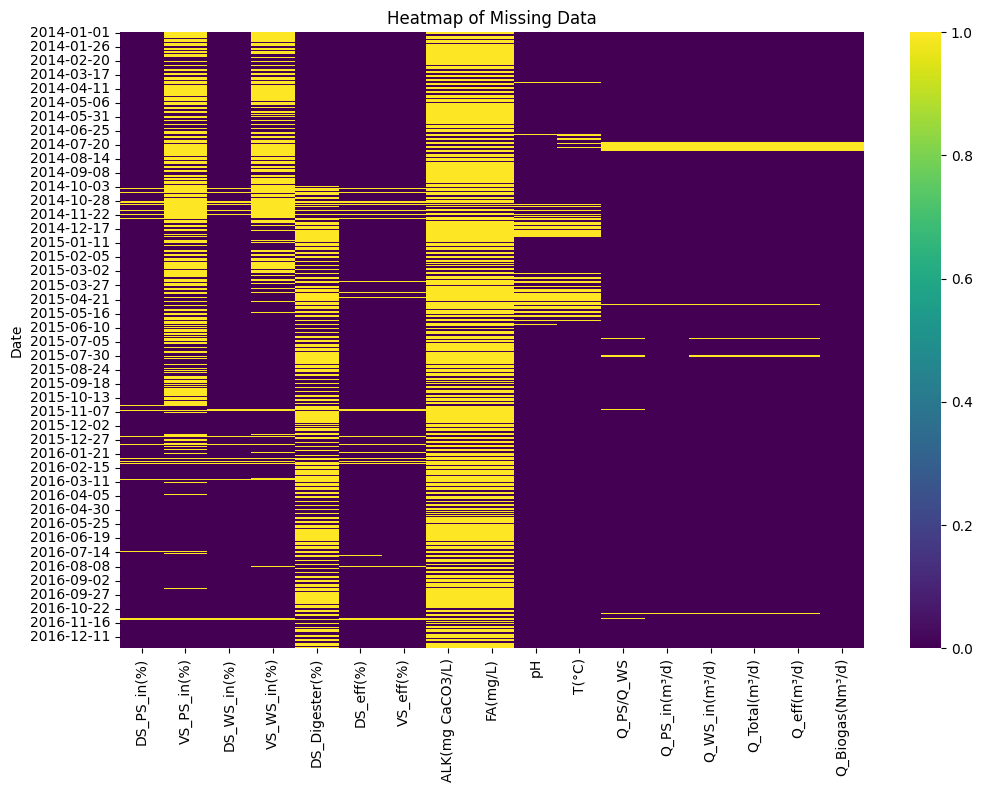

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Convert the index to date if it's not already
df.index = pd.to_datetime(df.index).date

plt.figure(figsize=(12, 8))
# Set cbar=True to show the color bar
sns.heatmap(df.isnull(), cbar=True, cmap='viridis')
plt.title('Heatmap of Missing Data')
plt.ylabel('Date')  # Label the y-axis as 'Date'
plt.tick_params(axis='x', rotation=90)
plt.show()

### 1.4 Initial Data Visualization

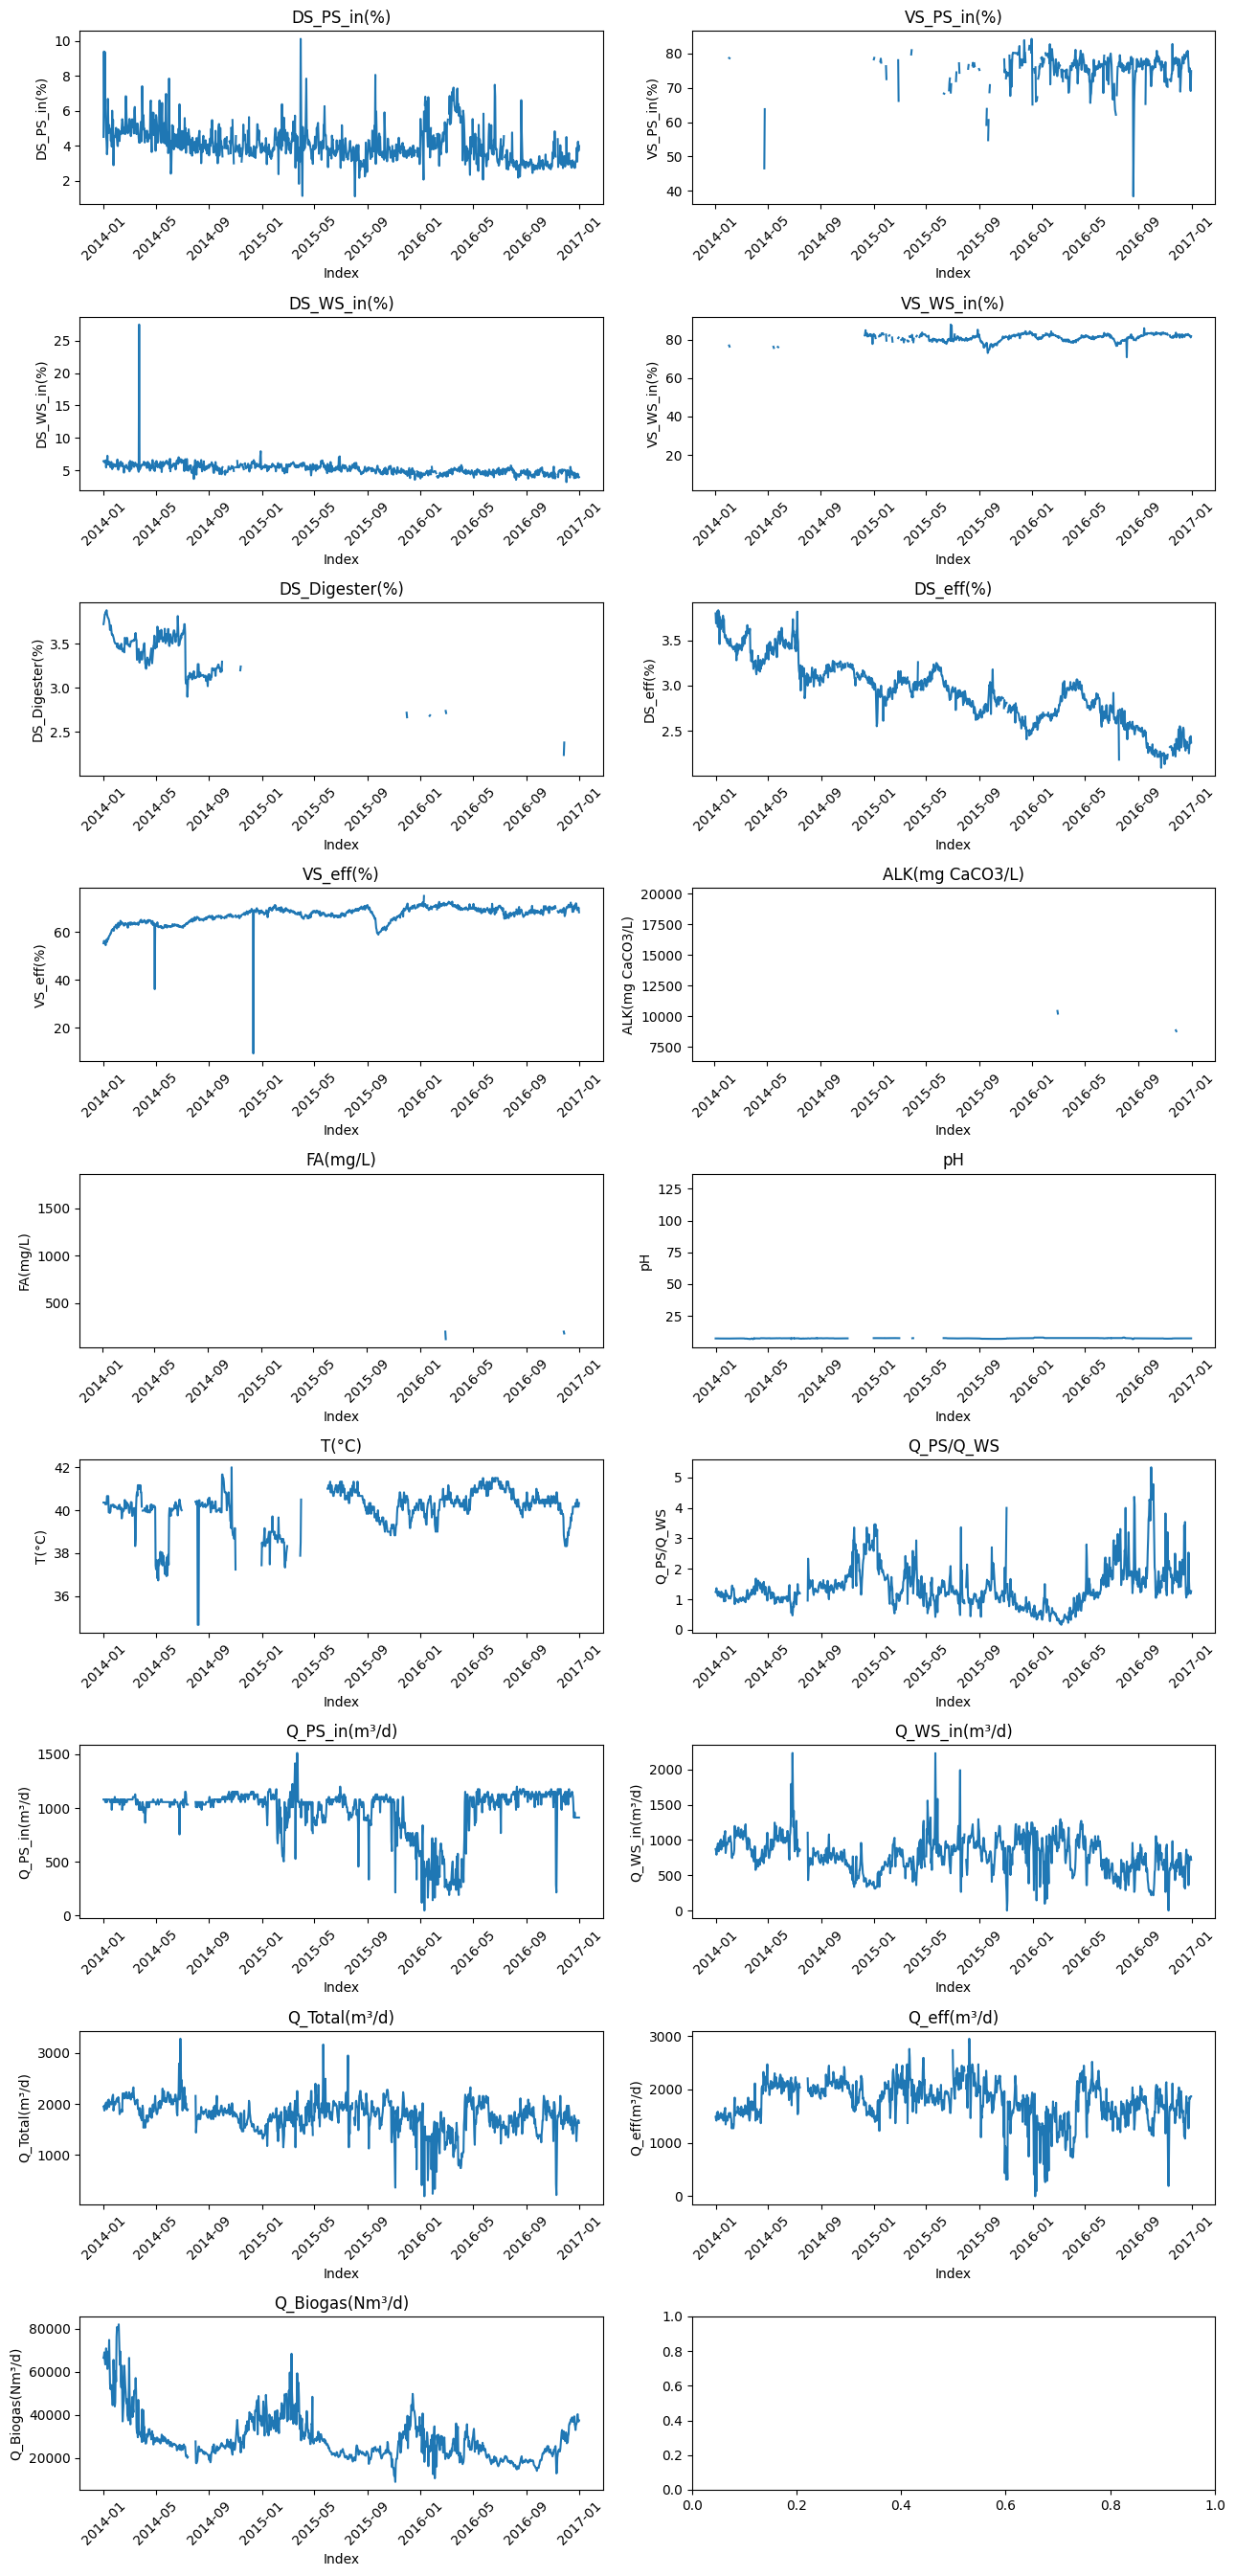

In [6]:
# Assuming df is your DataFrame and it contains multiple columns
num_variables = len(df.columns)  # Number of variables to plot
num_rows = (num_variables + 1) // 2  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, 2, figsize=(13, 3 * num_rows))  # Adjust the size as needed, now with 2 columns

for i, column in enumerate(df.columns):
    ax = axes[i // 2, i % 2]  # Determine the correct subplot
    ax.plot(df[column])
    ax.set_title(column)
    ax.set_xlabel('Index')
    ax.set_ylabel(column)
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels by 45 degrees

plt.tight_layout()
plt.show()

In [10]:
df

DS_PS_in(%)  VS_PS_in(%)  DS_WS_in(%)  VS_WS_in(%)  \
2014-01-01        4.515          NaN        6.435          NaN   
2014-01-02        9.405        38.49        6.315        76.97   
2014-01-03        6.090          NaN        6.255          NaN   
2014-01-04        9.375          NaN        6.405          NaN   
2014-01-05        6.210        69.12        6.510        76.26   
...                 ...          ...          ...          ...   
2016-12-27        3.100        75.80        4.050        82.00   
2016-12-28        4.190        75.70        4.500        82.10   
2016-12-29        4.250        70.00        4.250        81.90   
2016-12-30        3.720        69.10        3.900        81.10   
2016-12-31        4.000        74.90        3.950        81.70   

            DS_Digester(%)  DS_eff(%)  VS_eff(%)  ALK(mg CaCO3/L)  FA(mg/L)  \
2014-01-01        3.720000      3.800      55.30              NaN       NaN   
2014-01-02        3.748000      3.690      56.29              NaN       NaN   
2014-01-03        3.796000      3.750      56.21              NaN       NaN   
2014-01-04        3.834000      3.800      55.16     17740.000000    1320.0   
2014-01-05        3.832000      3.825      55.02              NaN       NaN   
...                    ...        ...        ...              ...       ...   
2016-12-27             NaN      2.335      69.10              NaN       NaN   
2016-12-28        2.216667      2.425      69.90              NaN       NaN   
2016-12-29             NaN      2.360      69.40              NaN       NaN   
2016-12-30             NaN      2.440      70.20              NaN       NaN   
2016-12-31        2.166667      2.370      68.20      8771.666667     280.0   

                  pH      T(°C)  Q_PS/Q_WS  Q_PS_in(m³/d)  Q_WS_in(m³/d)  \
2014-01-01  7.252000  40.360000   1.239669         1080.0          871.2   
2014-01-02  7.260000  40.360000   1.278409         1080.0          844.8   
2014-01-03  7.262000  40.360000   1.363636         1080.0          792.0   
2014-01-04  7.254000  40.360000   1.203209         1080.0          897.6   
2014-01-05  7.252000  40.280000   1.176471         1056.0          897.6   
...              ...        ...        ...            ...            ...   
2016-12-27  7.333333  40.500000   1.266667          912.0          720.0   
2016-12-28  7.333333  40.166667   1.266667          912.0          720.0   
2016-12-29  7.333333  40.166667   1.187500          912.0          768.0   
2016-12-30  7.328333  40.166667   1.187500          912.0          768.0   
2016-12-31  7.316667  40.333333   1.266667          912.0          720.0   

            Q_Total(m³/d)  Q_eff(m³/d)  Q_Biogas(Nm³/d)  
2014-01-01         1951.2       1488.0          66480.0  
2014-01-02         1924.8       1440.0          67272.0  
2014-01-03         1872.0       1416.0          69000.0  
2014-01-04         1977.6       1560.0          65544.0  
2014-01-05         1953.6       1536.0          63360.0  
...                   ...          ...              ...  
2016-12-27         1632.0       1848.0          39888.0  
2016-12-28         1632.0       1824.0          40272.0  
2016-12-29         1680.0       1848.0          37776.0  
2016-12-30         1680.0       1872.0          36816.0  
2016-12-31         1632.0       1872.0          37440.0  

[1096 rows x 17 columns]

## 2. Imputation

### 2.1 Time Interpolation

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Time interpolation
df_interpolated = df.interpolate(method='time')

# Check for any remaining missing values
if df_interpolated.isnull().sum().sum() > 0:
    # Use forward-fill and backward-fill as fallback
    df_interpolated = df_interpolated.ffill().bfill()

# Seasonal decomposition to handle any remaining missing values
def decompose_and_fill(df):
    df_filled = df.copy()
    for column in df.columns:
        if df[column].isnull().any():
            decomposition = seasonal_decompose(df[column], model='additive', period=365)
            trend = decomposition.trend
            seasonal = decomposition.seasonal
            resid = decomposition.resid

            # Fill missing values in trend, seasonal, and resid components
            trend_filled = trend.interpolate(method='time')
            seasonal_filled = seasonal.interpolate(method='time')
            resid_filled = resid.interpolate(method='time')

            # Combine the filled components
            df_filled[column] = trend_filled + seasonal_filled + resid_filled
    return df_filled

df_tsa = decompose_and_fill(df_interpolated)

# Check for any remaining missing values
df_tsa.isnull().sum()

# Update the DataFrame with imputed values
df_tsa


DS_PS_in(%)  VS_PS_in(%)  DS_WS_in(%)  VS_WS_in(%)  \
Date                                                             
2014-01-01        4.515        38.49        6.435    76.970000   
2014-01-02        9.405        38.49        6.315    76.970000   
2014-01-03        6.090        48.70        6.255    76.733333   
2014-01-04        9.375        58.91        6.405    76.496667   
2014-01-05        6.210        69.12        6.510    76.260000   
...                 ...          ...          ...          ...   
2016-12-27        3.100        75.80        4.050    82.000000   
2016-12-28        4.190        75.70        4.500    82.100000   
2016-12-29        4.250        70.00        4.250    81.900000   
2016-12-30        3.720        69.10        3.900    81.100000   
2016-12-31        4.000        74.90        3.950    81.700000   

            DS_Digester(%)  DS_eff(%)  VS_eff(%)  ALK(mg CaCO3/L)  FA(mg/L)  \
Date                                                                          
2014-01-01        3.720000      3.800      55.30     17740.000000    1320.0   
2014-01-02        3.748000      3.690      56.29     17740.000000    1320.0   
2014-01-03        3.796000      3.750      56.21     17740.000000    1320.0   
2014-01-04        3.834000      3.800      55.16     17740.000000    1320.0   
2014-01-05        3.832000      3.825      55.02     18556.000000    1404.0   
...                    ...        ...        ...              ...       ...   
2016-12-27        2.225000      2.335      69.10      8821.000000     184.0   
2016-12-28        2.216667      2.425      69.90      8808.666667     208.0   
2016-12-29        2.200000      2.360      69.40      8796.333333     232.0   
2016-12-30        2.183333      2.440      70.20      8784.000000     256.0   
2016-12-31        2.166667      2.370      68.20      8771.666667     280.0   

                  pH      T(°C)  Q_PS/Q_WS  Q_PS_in(m³/d)  Q_WS_in(m³/d)  \
Date                                                                       
2014-01-01  7.252000  40.360000   1.239669         1080.0          871.2   
2014-01-02  7.260000  40.360000   1.278409         1080.0          844.8   
2014-01-03  7.262000  40.360000   1.363636         1080.0          792.0   
2014-01-04  7.254000  40.360000   1.203209         1080.0          897.6   
2014-01-05  7.252000  40.280000   1.176471         1056.0          897.6   
...              ...        ...        ...            ...            ...   
2016-12-27  7.333333  40.500000   1.266667          912.0          720.0   
2016-12-28  7.333333  40.166667   1.266667          912.0          720.0   
2016-12-29  7.333333  40.166667   1.187500          912.0          768.0   
2016-12-30  7.328333  40.166667   1.187500          912.0          768.0   
2016-12-31  7.316667  40.333333   1.266667          912.0          720.0   

            Q_Total(m³/d)  Q_eff(m³/d)  Q_Biogas(Nm³/d)  
Date                                                     
2014-01-01         1951.2       1488.0          66480.0  
2014-01-02         1924.8       1440.0          67272.0  
2014-01-03         1872.0       1416.0          69000.0  
2014-01-04         1977.6       1560.0          65544.0  
2014-01-05         1953.6       1536.0          63360.0  
...                   ...          ...              ...  
2016-12-27         1632.0       1848.0          39888.0  
2016-12-28         1632.0       1824.0          40272.0  
2016-12-29         1680.0       1848.0          37776.0  
2016-12-30         1680.0       1872.0          36816.0  
2016-12-31         1632.0       1872.0          37440.0  

[1096 rows x 17 columns]

### 2.2 Choose Imputed DataFrame

In [14]:
# df=df_KNN
# df = df_woc
# df =df_softimpute
df =df_tsa
df

DS_PS_in(%)  VS_PS_in(%)  DS_WS_in(%)  VS_WS_in(%)  \
Date                                                             
2014-01-01        4.515        38.49        6.435    76.970000   
2014-01-02        9.405        38.49        6.315    76.970000   
2014-01-03        6.090        48.70        6.255    76.733333   
2014-01-04        9.375        58.91        6.405    76.496667   
2014-01-05        6.210        69.12        6.510    76.260000   
...                 ...          ...          ...          ...   
2016-12-27        3.100        75.80        4.050    82.000000   
2016-12-28        4.190        75.70        4.500    82.100000   
2016-12-29        4.250        70.00        4.250    81.900000   
2016-12-30        3.720        69.10        3.900    81.100000   
2016-12-31        4.000        74.90        3.950    81.700000   

            DS_Digester(%)  DS_eff(%)  VS_eff(%)  ALK(mg CaCO3/L)  FA(mg/L)  \
Date                                                                          
2014-01-01        3.720000      3.800      55.30     17740.000000    1320.0   
2014-01-02        3.748000      3.690      56.29     17740.000000    1320.0   
2014-01-03        3.796000      3.750      56.21     17740.000000    1320.0   
2014-01-04        3.834000      3.800      55.16     17740.000000    1320.0   
2014-01-05        3.832000      3.825      55.02     18556.000000    1404.0   
...                    ...        ...        ...              ...       ...   
2016-12-27        2.225000      2.335      69.10      8821.000000     184.0   
2016-12-28        2.216667      2.425      69.90      8808.666667     208.0   
2016-12-29        2.200000      2.360      69.40      8796.333333     232.0   
2016-12-30        2.183333      2.440      70.20      8784.000000     256.0   
2016-12-31        2.166667      2.370      68.20      8771.666667     280.0   

                  pH      T(°C)  Q_PS/Q_WS  Q_PS_in(m³/d)  Q_WS_in(m³/d)  \
Date                                                                       
2014-01-01  7.252000  40.360000   1.239669         1080.0          871.2   
2014-01-02  7.260000  40.360000   1.278409         1080.0          844.8   
2014-01-03  7.262000  40.360000   1.363636         1080.0          792.0   
2014-01-04  7.254000  40.360000   1.203209         1080.0          897.6   
2014-01-05  7.252000  40.280000   1.176471         1056.0          897.6   
...              ...        ...        ...            ...            ...   
2016-12-27  7.333333  40.500000   1.266667          912.0          720.0   
2016-12-28  7.333333  40.166667   1.266667          912.0          720.0   
2016-12-29  7.333333  40.166667   1.187500          912.0          768.0   
2016-12-30  7.328333  40.166667   1.187500          912.0          768.0   
2016-12-31  7.316667  40.333333   1.266667          912.0          720.0   

            Q_Total(m³/d)  Q_eff(m³/d)  Q_Biogas(Nm³/d)  
Date                                                     
2014-01-01         1951.2       1488.0          66480.0  
2014-01-02         1924.8       1440.0          67272.0  
2014-01-03         1872.0       1416.0          69000.0  
2014-01-04         1977.6       1560.0          65544.0  
2014-01-05         1953.6       1536.0          63360.0  
...                   ...          ...              ...  
2016-12-27         1632.0       1848.0          39888.0  
2016-12-28         1632.0       1824.0          40272.0  
2016-12-29         1680.0       1848.0          37776.0  
2016-12-30         1680.0       1872.0          36816.0  
2016-12-31         1632.0       1872.0          37440.0  

[1096 rows x 17 columns]

### 2.3 Visualization After Imputation

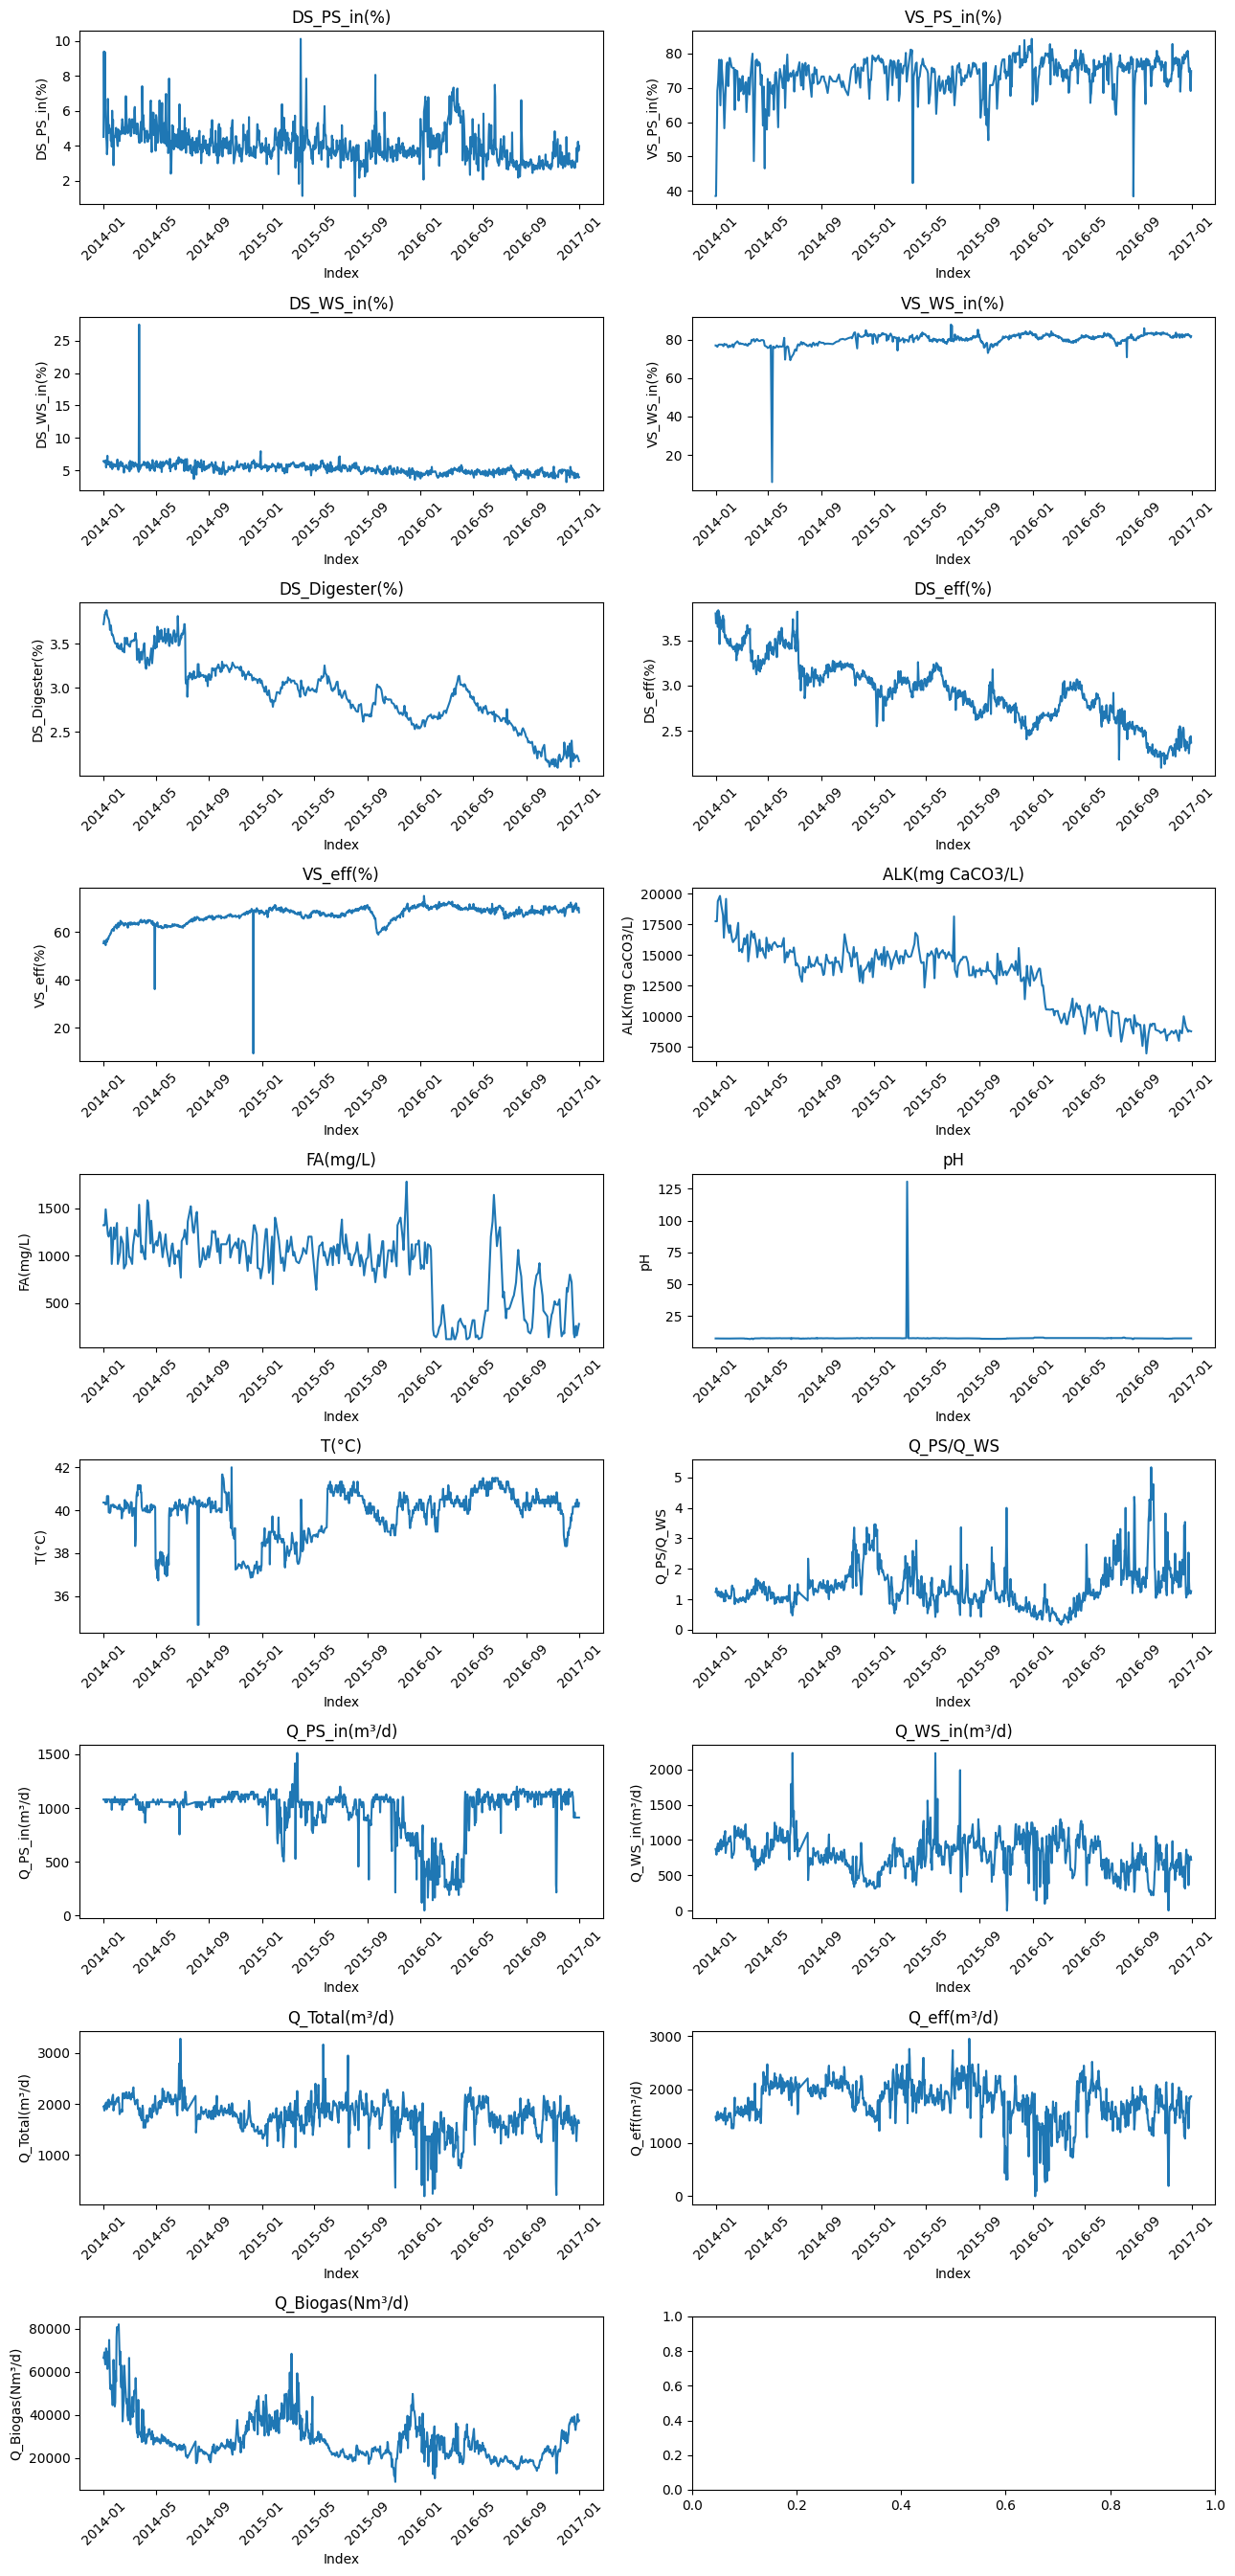

In [15]:
# Assuming df is your DataFrame and it contains multiple columns
num_variables = len(df.columns)  # Number of variables to plot
num_rows = (num_variables + 1) // 2  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, 2, figsize=(13, 3 * num_rows))  # Adjust the size as needed, now with 2 columns

for i, column in enumerate(df.columns):
    ax = axes[i // 2, i % 2]  # Determine the correct subplot
    ax.plot(df[column])
    ax.set_title(column)
    ax.set_xlabel('Index')
    ax.set_ylabel(column)
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels by 45 degrees

plt.tight_layout()
plt.show()

## 3. Summary Statistics

In [16]:
summary_stats = df.describe().round(2)
summary_stats.transpose()

count      mean       std      min       25%       50%  \
DS_PS_in(%)      1096.0      4.09      1.00     1.11      3.44      3.92   
VS_PS_in(%)      1096.0     73.76      5.02    38.38     71.61     74.77   
DS_WS_in(%)      1096.0      5.23      0.94     3.20      4.71      5.19   
VS_WS_in(%)      1096.0     79.86      3.90     5.90     78.29     80.32   
DS_Digester(%)   1096.0      2.94      0.39     2.09      2.68      2.96   
DS_eff(%)        1096.0      2.93      0.36     2.09      2.68      2.94   
VS_eff(%)        1096.0     67.11      3.70     9.24     65.47     67.90   
ALK(mg CaCO3/L)  1096.0  13133.17   2665.97  6967.40  10420.76  13927.90   
FA(mg/L)         1096.0    886.74    367.30   120.00    691.50    994.50   
pH               1096.0      7.65      5.00     6.68      7.27      7.37   
T(°C)            1096.0     39.81      1.12    34.67     39.17     40.17   
Q_PS/Q_WS        1096.0      1.40      0.70     0.16      1.00      1.25   
Q_PS_in(m³/d)    1096.0    975.53    224.01    48.00    960.00   1056.00   
Q_WS_in(m³/d)    1096.0    793.88    253.17     0.00    648.00    792.00   
Q_Total(m³/d)    1096.0   1769.39    319.12   192.00   1608.00   1800.00   
Q_eff(m³/d)      1096.0   1780.69    377.59     0.00   1560.00   1800.00   
Q_Biogas(Nm³/d)  1096.0  28875.48  10953.65  8808.00  21888.00  26000.00   

                      75%       max  
DS_PS_in(%)          4.58     10.13  
VS_PS_in(%)         77.01     84.28  
DS_WS_in(%)          5.66     27.48  
VS_WS_in(%)         81.91     87.83  
DS_Digester(%)       3.16      3.88  
DS_eff(%)            3.16      3.84  
VS_eff(%)           69.53     75.07  
ALK(mg CaCO3/L)  15009.25  19804.00  
FA(mg/L)          1125.75   1780.00  
pH                   7.50    130.70  
T(°C)               40.50     42.00  
Q_PS/Q_WS            1.66      5.33  
Q_PS_in(m³/d)     1104.00   1512.00  
Q_WS_in(m³/d)      960.00   2235.00  
Q_Total(m³/d)     1968.00   3282.00  
Q_eff(m³/d)       2041.25   2952.00  
Q_Biogas(Nm³/d)  32832.00  81984.00

## 4. Standardization

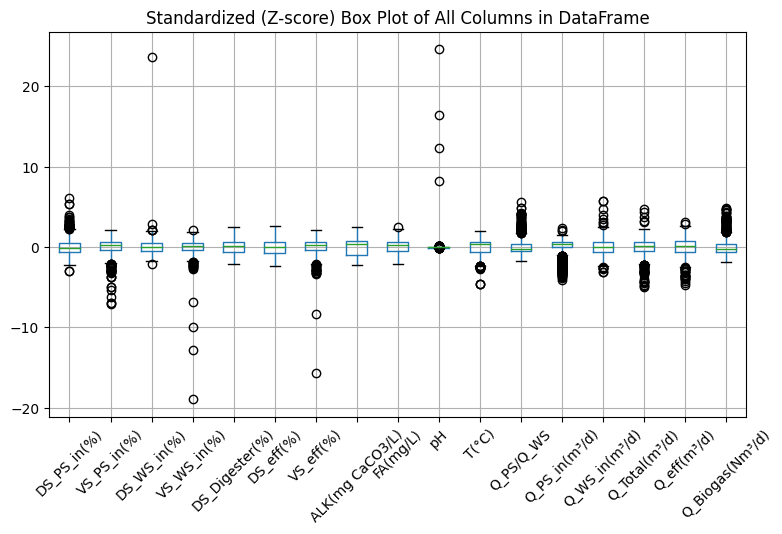

In [17]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Assuming df is your DataFrame and it contains only numerical data
# If df contains non-numerical columns, select only numerical columns first
numerical_df = df.select_dtypes(include=[np.number])
standardized_df = pd.DataFrame(scaler.fit_transform(numerical_df), columns=numerical_df.columns)

# Create a box plot for all columns in the standardized DataFrame
plt.figure(figsize=(9, 5))  # Set the figure size for better readability
standardized_df.boxplot()  # This will plot box plots for all numerical columns
plt.xticks(rotation=45)  # Rotate x labels for better visibility if needed
plt.title('Standardized (Z-score) Box Plot of All Columns in DataFrame')
plt.show()

## 5. Removing Outliers

In [18]:
from scipy.interpolate import interp1d
# Calculate z-scores to identify outliers
z_scores = (df - df.mean()) / df.std()

# Set a z-score threshold for identifying outliers
z_threshold = 3

# Identify outliers
outliers = (np.abs(z_scores) > z_threshold).any(axis=1)

# Create an array of indices
indices = np.arange(len(df))

# Create an interpolation function for each column
interp_funcs = {}
for column in df.columns:
    interp_funcs[column] = interp1d(indices[~outliers], df.loc[~outliers, column], kind='linear', fill_value='extrapolate')

# Replace outliers with interpolated values for each column
data_interp = pd.DataFrame({column: interp_funcs[column](indices) for column in df.columns})

data_interp.index = df.index

df_ro=data_interp

df_ro_sum = df_ro.describe().round(2)
df_ro_sum.transpose()

count      mean      std       min       25%       50%  \
DS_PS_in(%)      1096.0      4.03     0.89      1.11      3.44      3.92   
VS_PS_in(%)      1096.0     74.01     4.14     59.03     71.79     74.73   
DS_WS_in(%)      1096.0      5.23     0.71      3.20      4.71      5.20   
VS_WS_in(%)      1096.0     80.02     2.42     69.28     78.29     80.34   
DS_Digester(%)   1096.0      2.94     0.39      2.09      2.68      2.96   
DS_eff(%)        1096.0      2.92     0.35      2.09      2.68      2.94   
VS_eff(%)        1096.0     67.18     3.15     53.59     65.43     67.90   
ALK(mg CaCO3/L)  1096.0  13141.80  2708.66   6967.40  10414.38  13927.90   
FA(mg/L)         1096.0    886.57   367.53    120.00    674.74    997.67   
pH               1096.0      7.37     0.19      6.68      7.27      7.37   
T(°C)            1096.0     39.83     1.09     36.73     39.17     40.17   
Q_PS/Q_WS        1096.0      1.37     0.61      0.25      1.00      1.25   
Q_PS_in(m³/d)    1096.0    984.42   203.54    312.00    960.00   1056.00   
Q_WS_in(m³/d)    1096.0    801.54   223.96    264.00    648.00    808.73   
Q_Total(m³/d)    1096.0   1785.95   260.41    816.00   1632.00   1800.00   
Q_eff(m³/d)      1096.0   1802.89   326.82    720.00   1581.00   1800.00   
Q_Biogas(Nm³/d)  1096.0  28750.99  9883.40  13080.00  21980.00  26232.00   

                      75%       max  
DS_PS_in(%)          4.56      6.87  
VS_PS_in(%)         76.92     84.28  
DS_WS_in(%)          5.66      9.02  
VS_WS_in(%)         81.92     87.83  
DS_Digester(%)       3.16      4.05  
DS_eff(%)            3.16      3.82  
VS_eff(%)           69.54     75.07  
ALK(mg CaCO3/L)  15005.39  21345.40  
FA(mg/L)          1128.00   1780.00  
pH                   7.50      7.98  
T(°C)               40.50     42.00  
Q_PS/Q_WS            1.65      3.46  
Q_PS_in(m³/d)     1104.00   1512.00  
Q_WS_in(m³/d)      960.00   1488.00  
Q_Total(m³/d)     1968.00   2470.00  
Q_eff(m³/d)       2064.00   2856.00  
Q_Biogas(Nm³/d)  32892.00  71856.00

## 6. Visualization After Outlier Removal

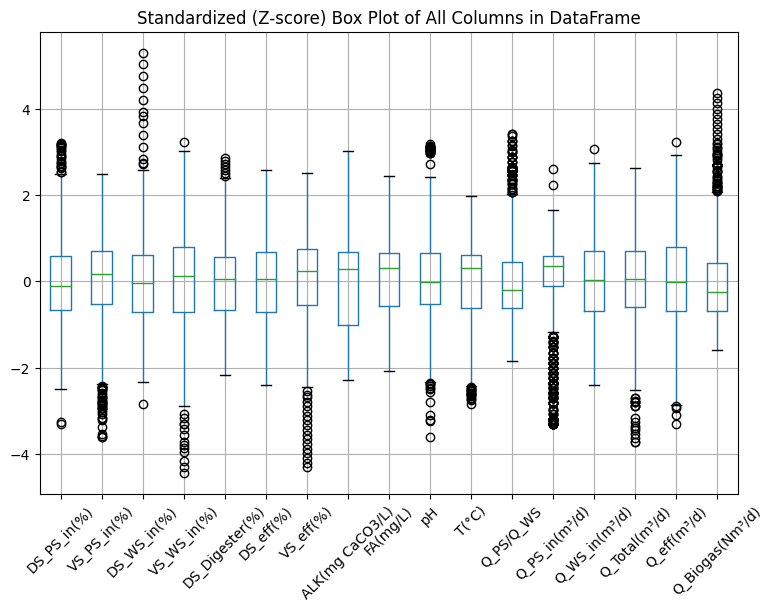

In [19]:

# Initialize the StandardScaler
scaler = StandardScaler()

# Assuming df is your DataFrame and it contains only numerical data
# If df contains non-numerical columns, select only numerical columns first
numerical_df = df_ro.select_dtypes(include=[np.number])
standardized_df = pd.DataFrame(scaler.fit_transform(numerical_df), columns=numerical_df.columns)

# Create a box plot for all columns in the standardized DataFrame
plt.figure(figsize=(9, 6))  # Set the figure size for better readability
standardized_df.boxplot()  # This will plot box plots for all numerical columns
plt.xticks(rotation=45)  # Rotate x labels for better visibility if needed
plt.title('Standardized (Z-score) Box Plot of All Columns in DataFrame')
plt.show()

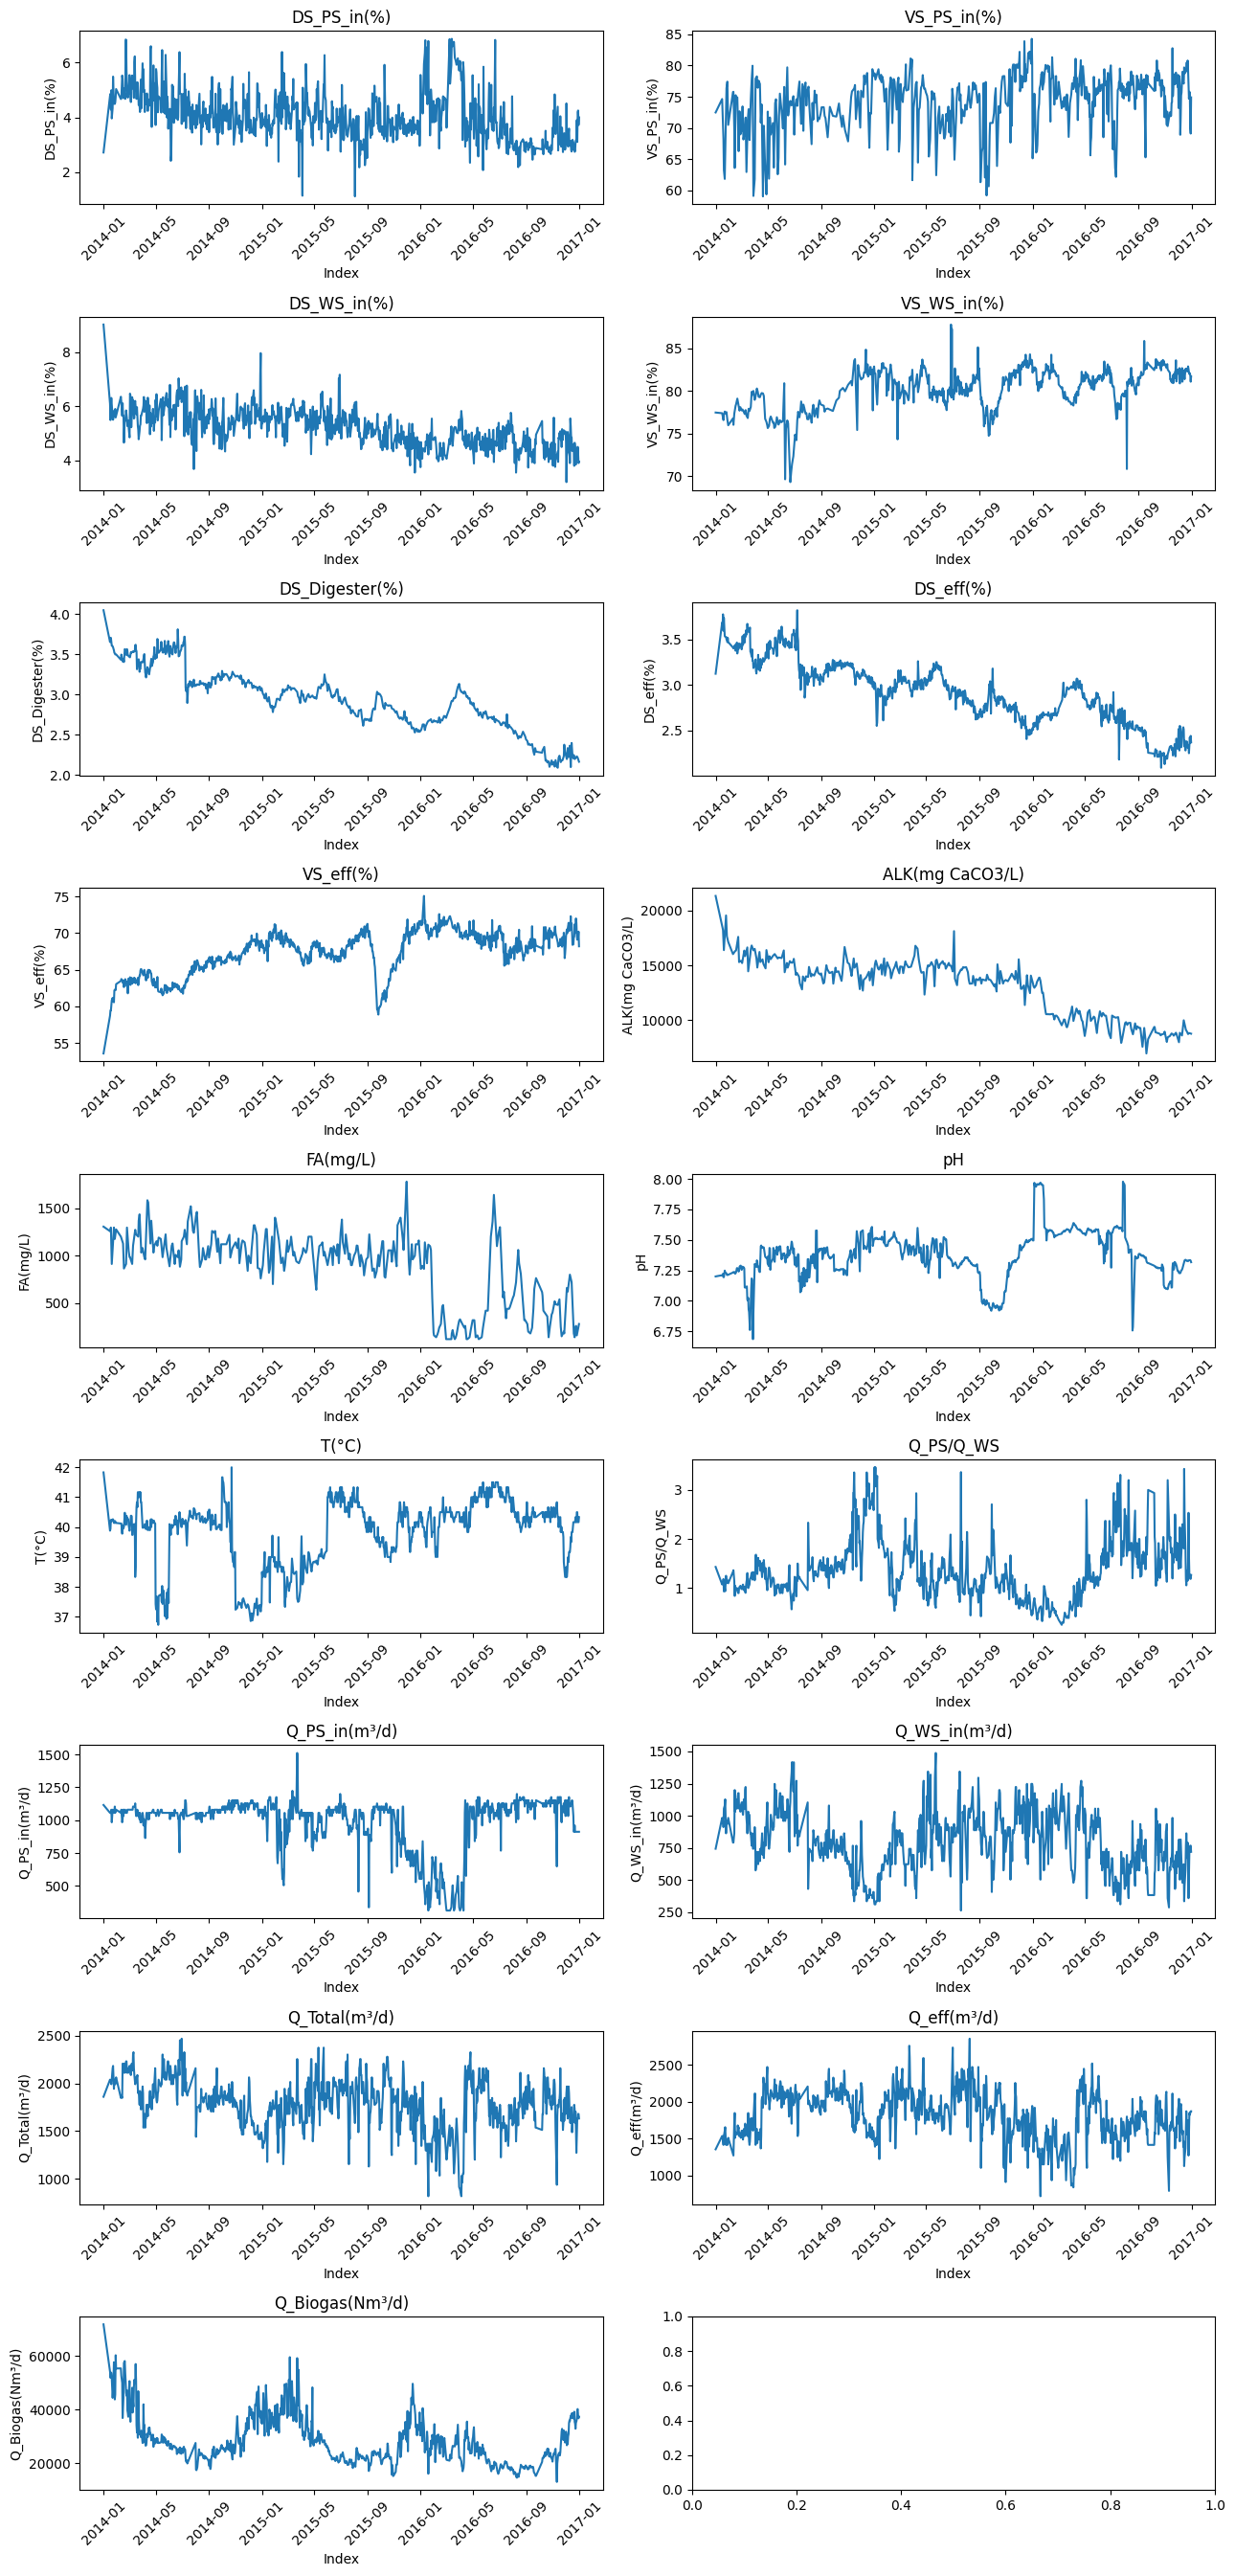

In [20]:
# Assuming df_ro is your DataFrame and it contains multiple columns
num_variables = len(df_ro.columns)  # Number of variables to plot
num_rows = (num_variables + 1) // 2  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, 2, figsize=(13, 3 * num_rows))  # Adjust the size as needed, now with 2 columns

for i, column in enumerate(df_ro.columns):
    ax = axes[i // 2, i % 2]  # Determine the correct subplot
    ax.plot(df_ro[column])
    ax.set_title(column)
    ax.set_xlabel('Index')
    ax.set_ylabel(column)
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels by 45 degrees

plt.tight_layout()
plt.show()

## 7. Final Data Preparation

In [24]:
df=df_ro
df.index = index_list
df.describe().round(2).transpose()

count      mean      std       min       25%       50%  \
DS_PS_in(%)      1096.0      4.03     0.89      1.11      3.44      3.92   
VS_PS_in(%)      1096.0     74.01     4.14     59.03     71.79     74.73   
DS_WS_in(%)      1096.0      5.23     0.71      3.20      4.71      5.20   
VS_WS_in(%)      1096.0     80.02     2.42     69.28     78.29     80.34   
DS_Digester(%)   1096.0      2.94     0.39      2.09      2.68      2.96   
DS_eff(%)        1096.0      2.92     0.35      2.09      2.68      2.94   
VS_eff(%)        1096.0     67.18     3.15     53.59     65.43     67.90   
ALK(mg CaCO3/L)  1096.0  13141.80  2708.66   6967.40  10414.38  13927.90   
FA(mg/L)         1096.0    886.57   367.53    120.00    674.74    997.67   
pH               1096.0      7.37     0.19      6.68      7.27      7.37   
T(°C)            1096.0     39.83     1.09     36.73     39.17     40.17   
Q_PS/Q_WS        1096.0      1.37     0.61      0.25      1.00      1.25   
Q_PS_in(m³/d)    1096.0    984.42   203.54    312.00    960.00   1056.00   
Q_WS_in(m³/d)    1096.0    801.54   223.96    264.00    648.00    808.73   
Q_Total(m³/d)    1096.0   1785.95   260.41    816.00   1632.00   1800.00   
Q_eff(m³/d)      1096.0   1802.89   326.82    720.00   1581.00   1800.00   
Q_Biogas(Nm³/d)  1096.0  28750.99  9883.40  13080.00  21980.00  26232.00   

                      75%       max  
DS_PS_in(%)          4.56      6.87  
VS_PS_in(%)         76.92     84.28  
DS_WS_in(%)          5.66      9.02  
VS_WS_in(%)         81.92     87.83  
DS_Digester(%)       3.16      4.05  
DS_eff(%)            3.16      3.82  
VS_eff(%)           69.54     75.07  
ALK(mg CaCO3/L)  15005.39  21345.40  
FA(mg/L)          1128.00   1780.00  
pH                   7.50      7.98  
T(°C)               40.50     42.00  
Q_PS/Q_WS            1.65      3.46  
Q_PS_in(m³/d)     1104.00   1512.00  
Q_WS_in(m³/d)      960.00   1488.00  
Q_Total(m³/d)     1968.00   2470.00  
Q_eff(m³/d)       2064.00   2856.00  
Q_Biogas(Nm³/d)  32892.00  71856.00

In [25]:
df.to_csv('PP_data.csv')

# Create DF for models

In [2]:
df= pd.read_csv('E:/Model/Biogas_NewModel/PP_data.csv',parse_dates=True,index_col=0,)#
df.head()
index_list = list(df.index)


In [3]:

# Define the categories
categories = {
    'Flow Rate': ['Q_PS_in(m³/d)', 'Q_WS_in(m³/d)', 'Q_Total(m³/d)', 'Q_eff(m³/d)', 'Q_PS/Q_WS'],
    'Operational': ['ALK(mg CaCO3/L)', 'FA(mg/L)', 'pH', 'T(°C)'],
    'Digester Content': ['DS_PS_in(%)', 'VS_PS_in(%)', 'DS_WS_in(%)', 'VS_WS_in(%)', 'DS_Digester(%)','DS_eff(%)', 'VS_eff(%)'],
    'Biogas Production': ['Q_Biogas(Nm³/d)']
}

# Function to filter DataFrame based on selected categories
def filter_df_by_category(df, selected_categories):
    selected_columns = []
    for category in selected_categories:
        selected_columns.extend(categories[category])
    return df[selected_columns]

# Specify LSTM df
selected_categories_LSTM = ['Flow Rate', 'Digester Content']
df_LSTM = filter_df_by_category(df, selected_categories_LSTM)

# Specify XGB df
selected_categories_xgb = ['Flow Rate', 'Digester Content','Operational','Biogas Production']
df_xgb = filter_df_by_category(df, selected_categories_xgb)


In [32]:
df_LSTM.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1096 entries, 2014-01-01 to 2016-12-31
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Q_PS_in(m³/d)   1096 non-null   float64
 1   Q_WS_in(m³/d)   1096 non-null   float64
 2   Q_Total(m³/d)   1096 non-null   float64
 3   Q_eff(m³/d)     1096 non-null   float64
 4   Q_PS/Q_WS       1096 non-null   float64
 5   DS_PS_in(%)     1096 non-null   float64
 6   VS_PS_in(%)     1096 non-null   float64
 7   DS_WS_in(%)     1096 non-null   float64
 8   VS_WS_in(%)     1096 non-null   float64
 9   DS_Digester(%)  1096 non-null   float64
 10  DS_eff(%)       1096 non-null   float64
 11  VS_eff(%)       1096 non-null   float64
dtypes: float64(12)
memory usage: 111.3 KB


In [33]:
df_xgb.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1096 entries, 2014-01-01 to 2016-12-31
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Q_PS_in(m³/d)    1096 non-null   float64
 1   Q_WS_in(m³/d)    1096 non-null   float64
 2   Q_Total(m³/d)    1096 non-null   float64
 3   Q_eff(m³/d)      1096 non-null   float64
 4   Q_PS/Q_WS        1096 non-null   float64
 5   DS_PS_in(%)      1096 non-null   float64
 6   VS_PS_in(%)      1096 non-null   float64
 7   DS_WS_in(%)      1096 non-null   float64
 8   VS_WS_in(%)      1096 non-null   float64
 9   DS_Digester(%)   1096 non-null   float64
 10  DS_eff(%)        1096 non-null   float64
 11  VS_eff(%)        1096 non-null   float64
 12  ALK(mg CaCO3/L)  1096 non-null   float64
 13  FA(mg/L)         1096 non-null   float64
 14  pH               1096 non-null   float64
 15  T(°C)            1096 non-null   float64
 16  Q_Biogas(Nm³/d)  1096 non-null   float64
d

# Time-Series Modeling (LSTM)

## Import Data

* Import Data from directory after preprocessing 

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

import matplotlib.pyplot as plt
# % matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

import datetime

from sklearn.metrics import mean_absolute_error

from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [7]:
df_LSTM= df_LSTM
df_LSTM.head()
index_list = list(df_LSTM.index)


In [8]:
pd.options.display.float_format = '{:.2f}'.format
df_LSTM.head()

Q_PS_in(m³/d)  Q_WS_in(m³/d)  Q_Total(m³/d)  Q_eff(m³/d)  \
2014-01-01        1116.00         744.00        1860.00      1356.00   
2014-01-02        1112.00         760.00        1872.00      1368.00   
2014-01-03        1108.00         776.00        1884.00      1380.00   
2014-01-04        1104.00         792.00        1896.00      1392.00   
2014-01-05        1100.00         808.00        1908.00      1404.00   

            Q_PS/Q_WS  DS_PS_in(%)  VS_PS_in(%)  DS_WS_in(%)  VS_WS_in(%)  \
2014-01-01       1.43         2.72        72.48         9.02        77.47   
2014-01-02       1.41         2.85        72.63         8.82        77.46   
2014-01-03       1.38         2.99        72.77         8.62        77.46   
2014-01-04       1.36         3.13        72.91         8.43        77.45   
2014-01-05       1.34         3.27        73.06         8.23        77.45   

            DS_Digester(%)  DS_eff(%)  VS_eff(%)  
2014-01-01            4.05       3.12      53.59  
2014-01-02            4.02       3.16      53.93  
2014-01-03            4.00       3.20      54.28  
2014-01-04            3.97       3.23      54.62  
2014-01-05            3.94       3.27      54.96

In [37]:
df_LSTM['DATE']=pd.to_datetime(index_list)

## Visualize data

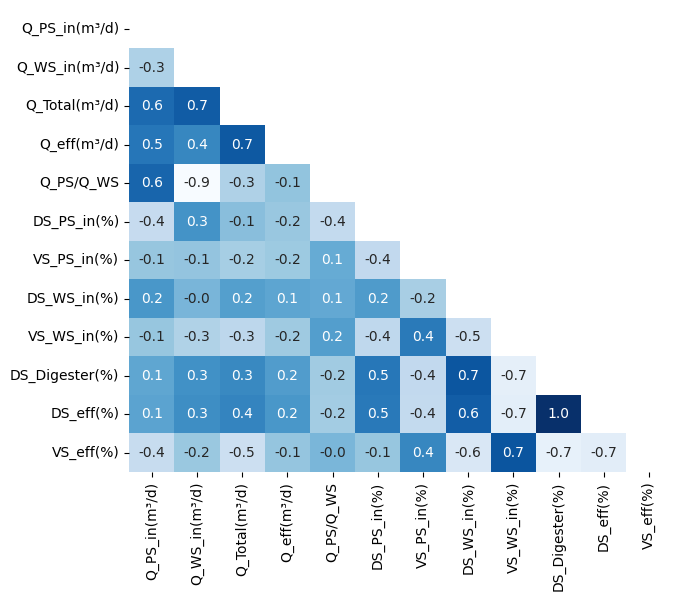

In [38]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = df_LSTM.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(7, 6))

# Draw the heatmap with the mask
sns.heatmap(corr, mask=mask, annot=True, cbar=False, cmap='Blues', fmt='.1f')

plt.show()

In [39]:
df_LSTM = df_LSTM.set_index('DATE')

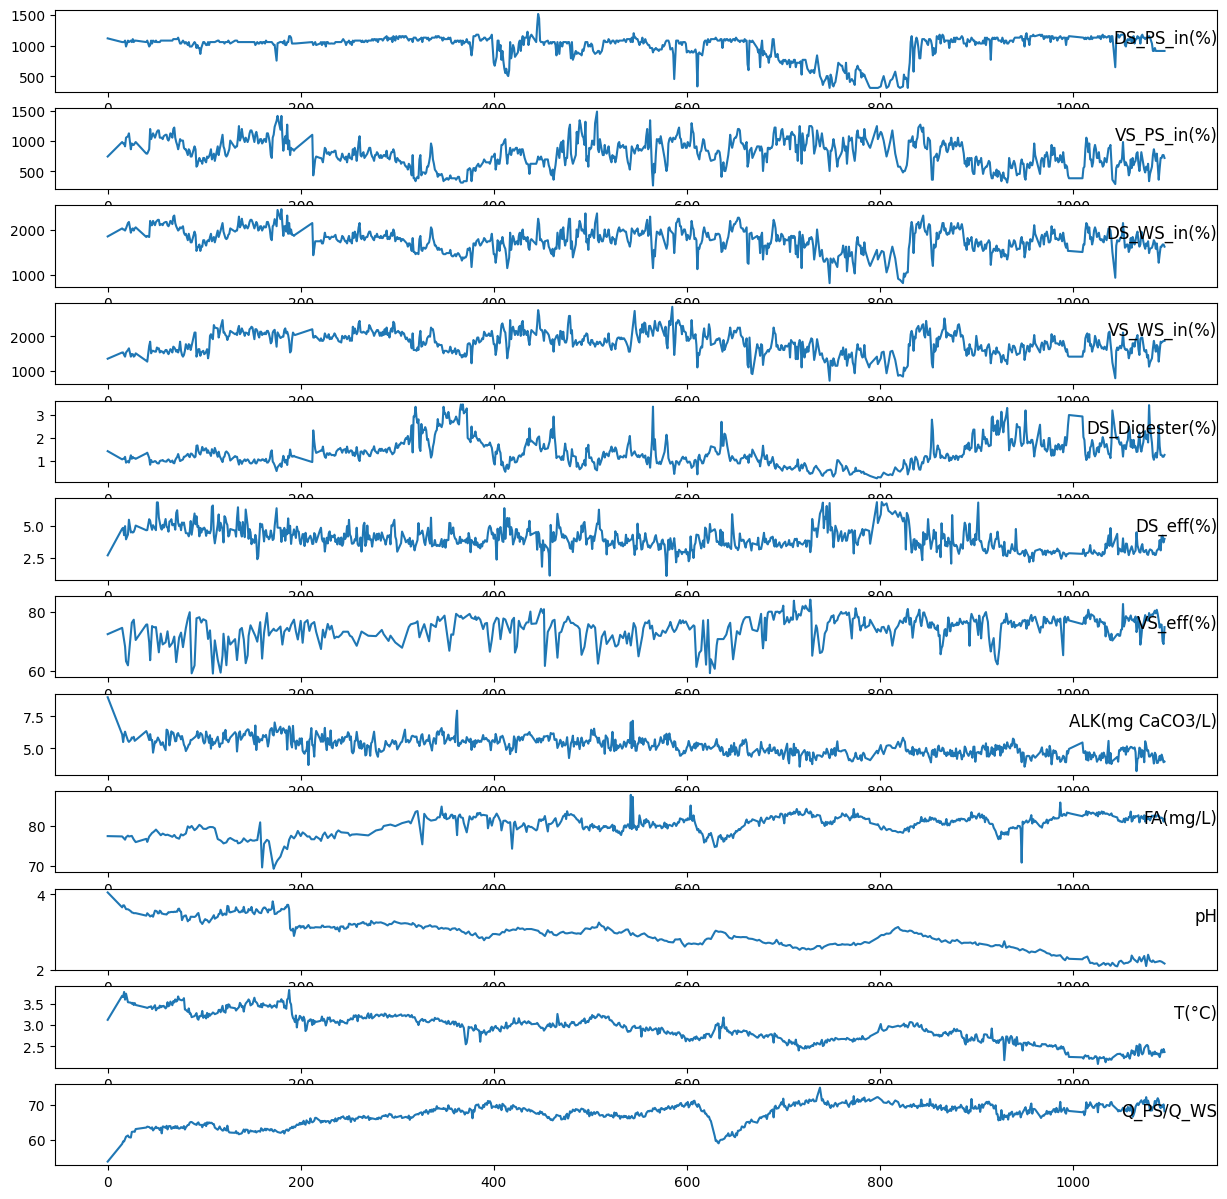

In [41]:
from matplotlib import pyplot
# load dataset
values = df_LSTM.values
# specify columns to plot
groups = list(range(0,len(df_LSTM.columns)))
i = 1
# plot each column
pyplot.figure(figsize=(15,15))
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
    pyplot.title(df.columns[group], y=0.5, loc='right')
    i += 1
pyplot.show()

## Features Engineering

In [9]:
# Calculate the split index
split_index = int(len(df_LSTM) * 0.7)

# Split the dataset
train_df, test_df = df_LSTM[:split_index], df_LSTM[split_index:]

# Verify the shapes
print(train_df.shape, test_df.shape)

(767, 12) (329, 12)


* Scaling the values

In [10]:
train = train_df
scalers={}
for i in train_df.columns:
    scaler = MinMaxScaler(feature_range=(-1,1))
    s_s = scaler.fit_transform(train[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+ i] = scaler
    train[i]=s_s

test = test_df
for i in train_df.columns:
    scaler = scalers['scaler_'+i]
    s_s = scaler.transform(test[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+i] = scaler
    test[i]=s_s

* Converting the series to samples 

Now I will make a function that will use a sliding window approach to transform our series into samples of input past observations and output future observations to use supervised learning algorithms.

In [45]:
def split_series(series, n_past, n_future):
  
  X, y = list(), list()
  for window_start in range(len(series)):
    past_end = window_start + n_past
    future_end = past_end + n_future
    if future_end > len(series):
      break
    past, future = series[window_start:past_end, :], series[past_end:future_end, :]
    X.append(past)
    y.append(future)
  return np.array(X), np.array(y)

For this case, let’s assume that given the past 10 days observation, we need to forecast the next 5 days observations.

In [46]:
n_past = 7
n_future = 1 
n_features =len(df_LSTM.columns)

* Convert both the train and test data into samples using the split_series function.

In [47]:
X_train, y_train = split_series(train.values,n_past, n_future)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1],n_features))
y_train = y_train.reshape((y_train.shape[0], y_train.shape[1], n_features))
X_test, y_test = split_series(test.values,n_past, n_future)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1],n_features))
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1], n_features))

## Modeling (LSTM)

E1D1 ==> Sequence to Sequence Model with one encoder layer and one decoder layer.

In [48]:
# E1D1

encoder_inputs = tf.keras.layers.Input(shape=(n_past, n_features))
encoder_l1 = tf.keras.layers.LSTM(100, return_state=True)
encoder_outputs1 = encoder_l1(encoder_inputs)

encoder_states1 = encoder_outputs1[1:]

decoder_inputs = tf.keras.layers.RepeatVector(n_future)(encoder_outputs1[0])

decoder_l1 = tf.keras.layers.LSTM(100, return_sequences=True)(decoder_inputs,initial_state = encoder_states1)
decoder_outputs1 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(n_features))(decoder_l1)

model_e1d1 = tf.keras.models.Model(encoder_inputs,decoder_outputs1)

model_e1d1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 7, 12)]              0         []                            
                                                                                                  
 lstm (LSTM)                 [(None, 100),                45200     ['input_1[0][0]']             
                              (None, 100),                                                        
                              (None, 100)]                                                        
                                                                                                  
 repeat_vector (RepeatVecto  (None, 1, 100)               0         ['lstm[0][0]']                
 r)                                                                                           

## Hyperparamters tuning of LSTM

In [ ]:
from kerastuner.tuners import BayesianOptimization
from tensorflow.keras.callbacks import EarlyStopping

# Define the model building function
def build_model(hp):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(units=hp.Int('units', min_value=50, max_value=200, step=50), 
                                    return_sequences=True, input_shape=(n_past, n_features)))
    model.add(tf.keras.layers.LSTM(units=hp.Int('units', min_value=50, max_value=200, step=50)))
    model.add(tf.keras.layers.RepeatVector(n_future))
    model.add(tf.keras.layers.LSTM(units=hp.Int('units', min_value=50, max_value=200, step=50), return_sequences=True))
    model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(n_features)))
    model.compile(optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                   loss=tf.keras.losses.Huber())
    return model

# Initialize the Bayesian Optimization tuner
tuner = BayesianOptimization(
    build_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1,
    directory='my_dir',
    project_name='lstm_biogas'
)

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Perform the hyperparameter search
tuner.search(X_train, y_train, epochs=50, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the optimal hyperparameters
model_e1d1 = tuner.hypermodel.build(best_hps)

# Train the model with early stopping
history = model_e1d1.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), 
                    batch_size=32, callbacks=[early_stopping])

## Training the LSTM

In [49]:
reduce_lr = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.90 ** x)

In [50]:

model_e1d1.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.Huber())

history_e1d1=model_e1d1.fit(X_train,y_train,epochs=25,
                            validation_data=(X_test,y_test),
                            batch_size=32,verbose=0,
                            callbacks=[reduce_lr])

In [51]:
pred_e1d1=model_e1d1.predict(X_test)

pred_e1d1_train = model_e1d1.predict(X_train)

24/24 [==============================] - 0s 5ms/step


## Inverse Scaling of the predicted values

In [52]:
for index,i in enumerate(train_df.columns):
    scaler = scalers['scaler_'+i]
    pred_e1d1[:,:,index]=scaler.inverse_transform(pred_e1d1[:,:,index])
    y_train[:,:,index]=scaler.inverse_transform(y_train[:,:,index])
    y_test[:,:,index]=scaler.inverse_transform(y_test[:,:,index])
    pred_e1d1_train[:,:,index]=scaler.inverse_transform(pred_e1d1_train[:,:,index])


## Checking Error

In [56]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Create a list to store the results
results = []

# Loop through each column and calculate MAE, RMSE, and R² for each day
for index, column_name in enumerate(train_df.columns):
    for j in range(1, 2):  # Assuming you want to display MAE, RMSE, and R² for Day 1
        # Test metrics
        mae_e1d1_test = mean_absolute_error(y_test[:, j-1, index], pred_e1d1[:, j-1, index])
        rmse_e1d1_test = np.sqrt(mean_squared_error(y_test[:, j-1, index], pred_e1d1[:, j-1, index]))
        r2_e1d1_test = r2_score(y_test[:, j-1, index], pred_e1d1[:, j-1, index])

        # Train metrics
        mae_e1d1_train = mean_absolute_error(y_train[:, j-1, index], pred_e1d1_train[:, j-1, index])
        rmse_e1d1_train = np.sqrt(mean_squared_error(y_train[:, j-1, index], pred_e1d1_train[:, j-1, index]))
        r2_e1d1_train = r2_score(y_train[:, j-1, index], pred_e1d1_train[:, j-1, index])

        results.append({
            "Feature": column_name,
            "Day": j,
            "MAE-E1D1-Test": mae_e1d1_test,
            "RMSE-E1D1-Test": rmse_e1d1_test,
            "R2-E1D1-Test": r2_e1d1_test,
            "MAE-E1D1-Train": mae_e1d1_train,
            "RMSE-E1D1-Train": rmse_e1d1_train,
            "R2-E1D1-Train": r2_e1d1_train,
        })

# Convert the list to a DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame
print(results_df)

           Feature  Day  MAE-E1D1-Test  RMSE-E1D1-Test  R2-E1D1-Test  \
0    Q_PS_in(m³/d)    1          81.98          104.01          0.85   
1    Q_WS_in(m³/d)    1         142.43          172.36          0.42   
2    Q_Total(m³/d)    1         142.35          175.96          0.60   
3      Q_eff(m³/d)    1         166.41          205.44          0.58   
4        Q_PS/Q_WS    1           0.40            0.54          0.45   
5      DS_PS_in(%)    1           0.37            0.56          0.72   
6      VS_PS_in(%)    1           1.64            2.29          0.46   
7      DS_WS_in(%)    1           0.32            0.40          0.18   
8      VS_WS_in(%)    1           0.60            0.91          0.68   
9   DS_Digester(%)    1           0.05            0.06          0.96   
10       DS_eff(%)    1           0.06            0.08          0.91   
11       VS_eff(%)    1           0.74            0.94          0.56   

    MAE-E1D1-Train  RMSE-E1D1-Train  R2-E1D1-Train  
0         

Reference:
"Multivariate Multi-step Time Series Forecasting using Stacked LSTM sequence to sequence Autoencoder in Tensorflow 2.0 / Keras"
https://www.analyticsvidhya.com/blog/2020/10/multivariate-multi-step-time-series-forecasting-using-stacked-lstm-sequence-to-sequence-autoencoder-in-tensorflow-2-0-keras/

## Visualize Prediction of the models

* Plot line through time

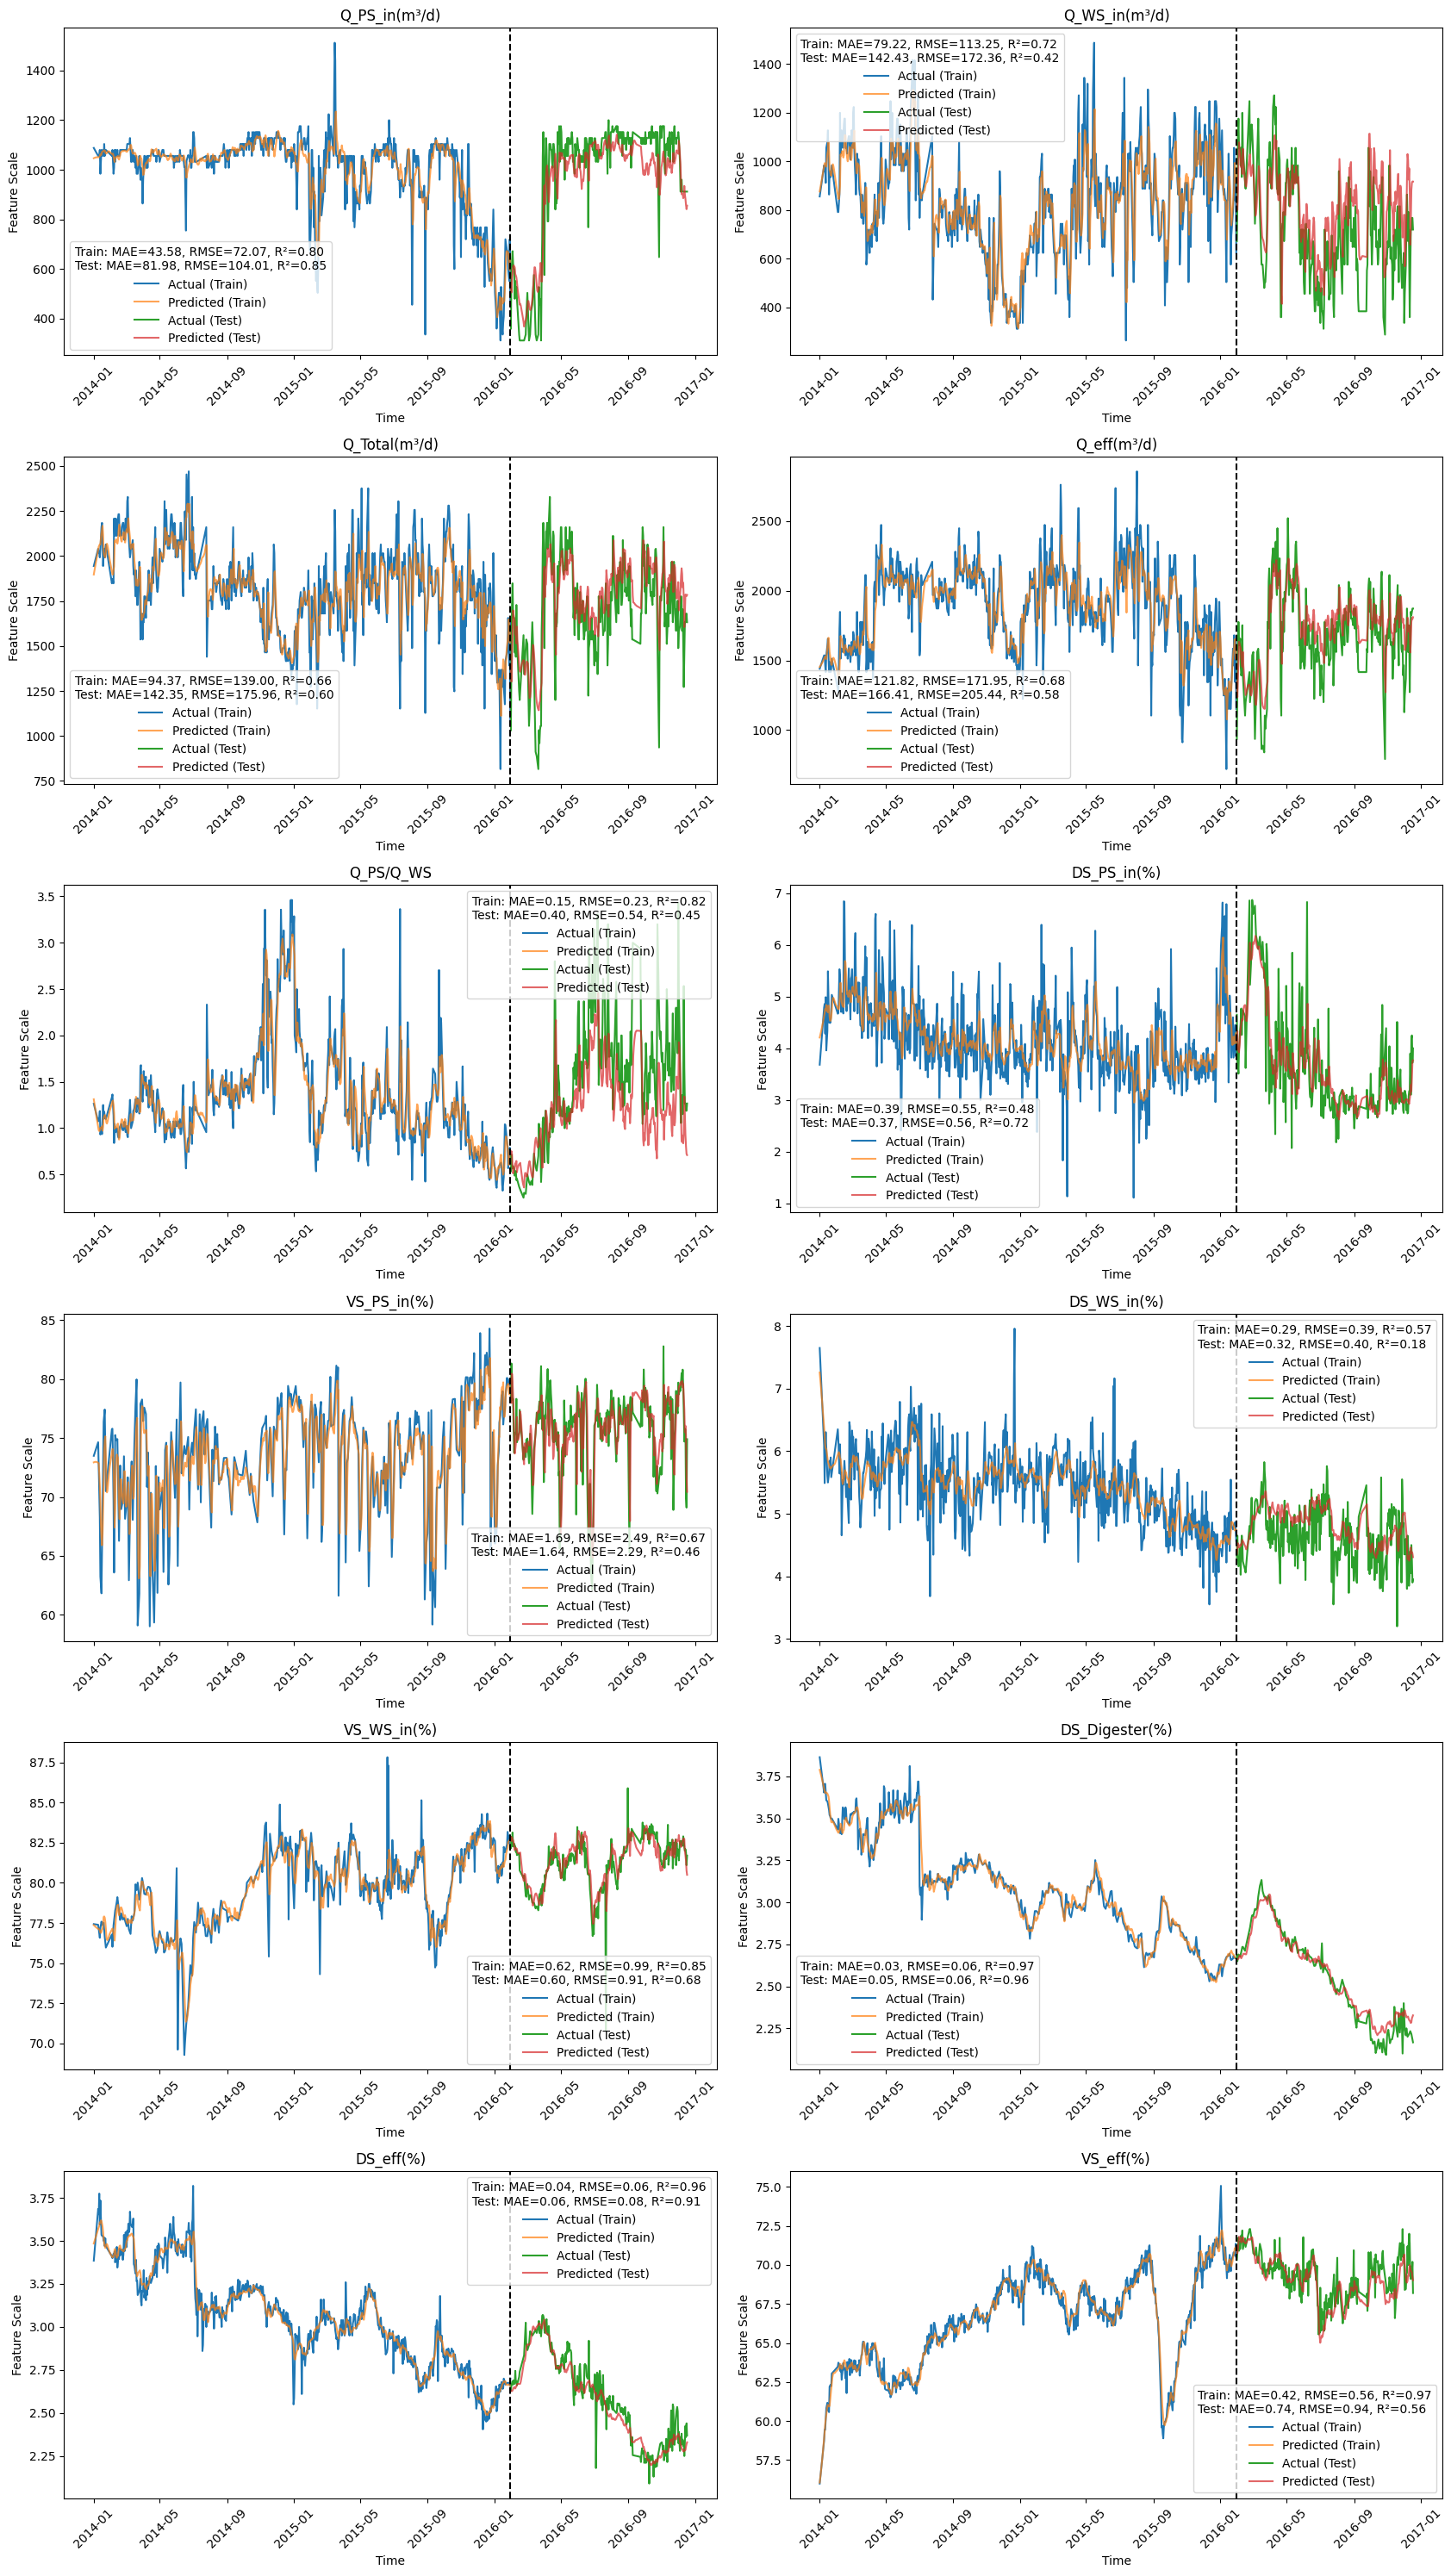

In [64]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Prepare data for plotting
train_time = df.index[:len(y_train)].to_list()  # Time index for training data
test_time = df.index[len(y_train):len(y_train) + len(y_test)].to_list()  # Time index for test data

# Calculate the number of rows needed for subplots
num_columns = len(df_LSTM.columns)
num_rows = (num_columns + 1) // 2  # Two columns per row

# Create a single figure with subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(17, 5 * num_rows))
axes = axes.flatten()

for i in range(num_columns):
    actual_train = y_train[:, :, i].flatten()  # Actual training data for feature i
    predicted_train = pred_e1d1_train[:, :, i].flatten()  # Predicted training data for feature i

    actual_test = y_test[:, :, i].flatten()  # Actual test data for feature i
    predicted_test = pred_e1d1[:, :, i].flatten()  # Predicted test data for feature i

    # Calculate metrics for test data
    mae_test = mean_absolute_error(actual_test, predicted_test)
    rmse_test = np.sqrt(mean_squared_error(actual_test, predicted_test))
    r2_test = r2_score(actual_test, predicted_test)

    # Calculate metrics for train data
    mae_train = mean_absolute_error(actual_train, predicted_train)
    rmse_train = np.sqrt(mean_squared_error(actual_train, predicted_train))
    r2_train = r2_score(actual_train, predicted_train)

    # Plot training data
    axes[i].plot(train_time, actual_train, label='Actual (Train)')
    axes[i].plot(train_time, predicted_train, label='Predicted (Train)', alpha=0.7)

    # Plot test data
    axes[i].plot(test_time, actual_test, label='Actual (Test)')
    axes[i].plot(test_time, predicted_test, label='Predicted (Test)', alpha=0.7)

    # Add a vertical line to separate train and test data
    axes[i].axvline(x=train_time[-1], color='k', linestyle='--')

    # Add titles and labels
    axes[i].set_title(df_LSTM.columns[i])  # Set title to the column name
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel('Feature Scale')
    axes[i].legend(title=f'Train: MAE={mae_train:.2f}, RMSE={rmse_train:.2f}, R²={r2_train:.2f}\n'
                         f'Test: MAE={mae_test:.2f}, RMSE={rmse_test:.2f}, R²={r2_test:.2f}')
    axes[i].tick_params(axis='x', rotation=45)

# Remove any empty subplots
for j in range(num_columns, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

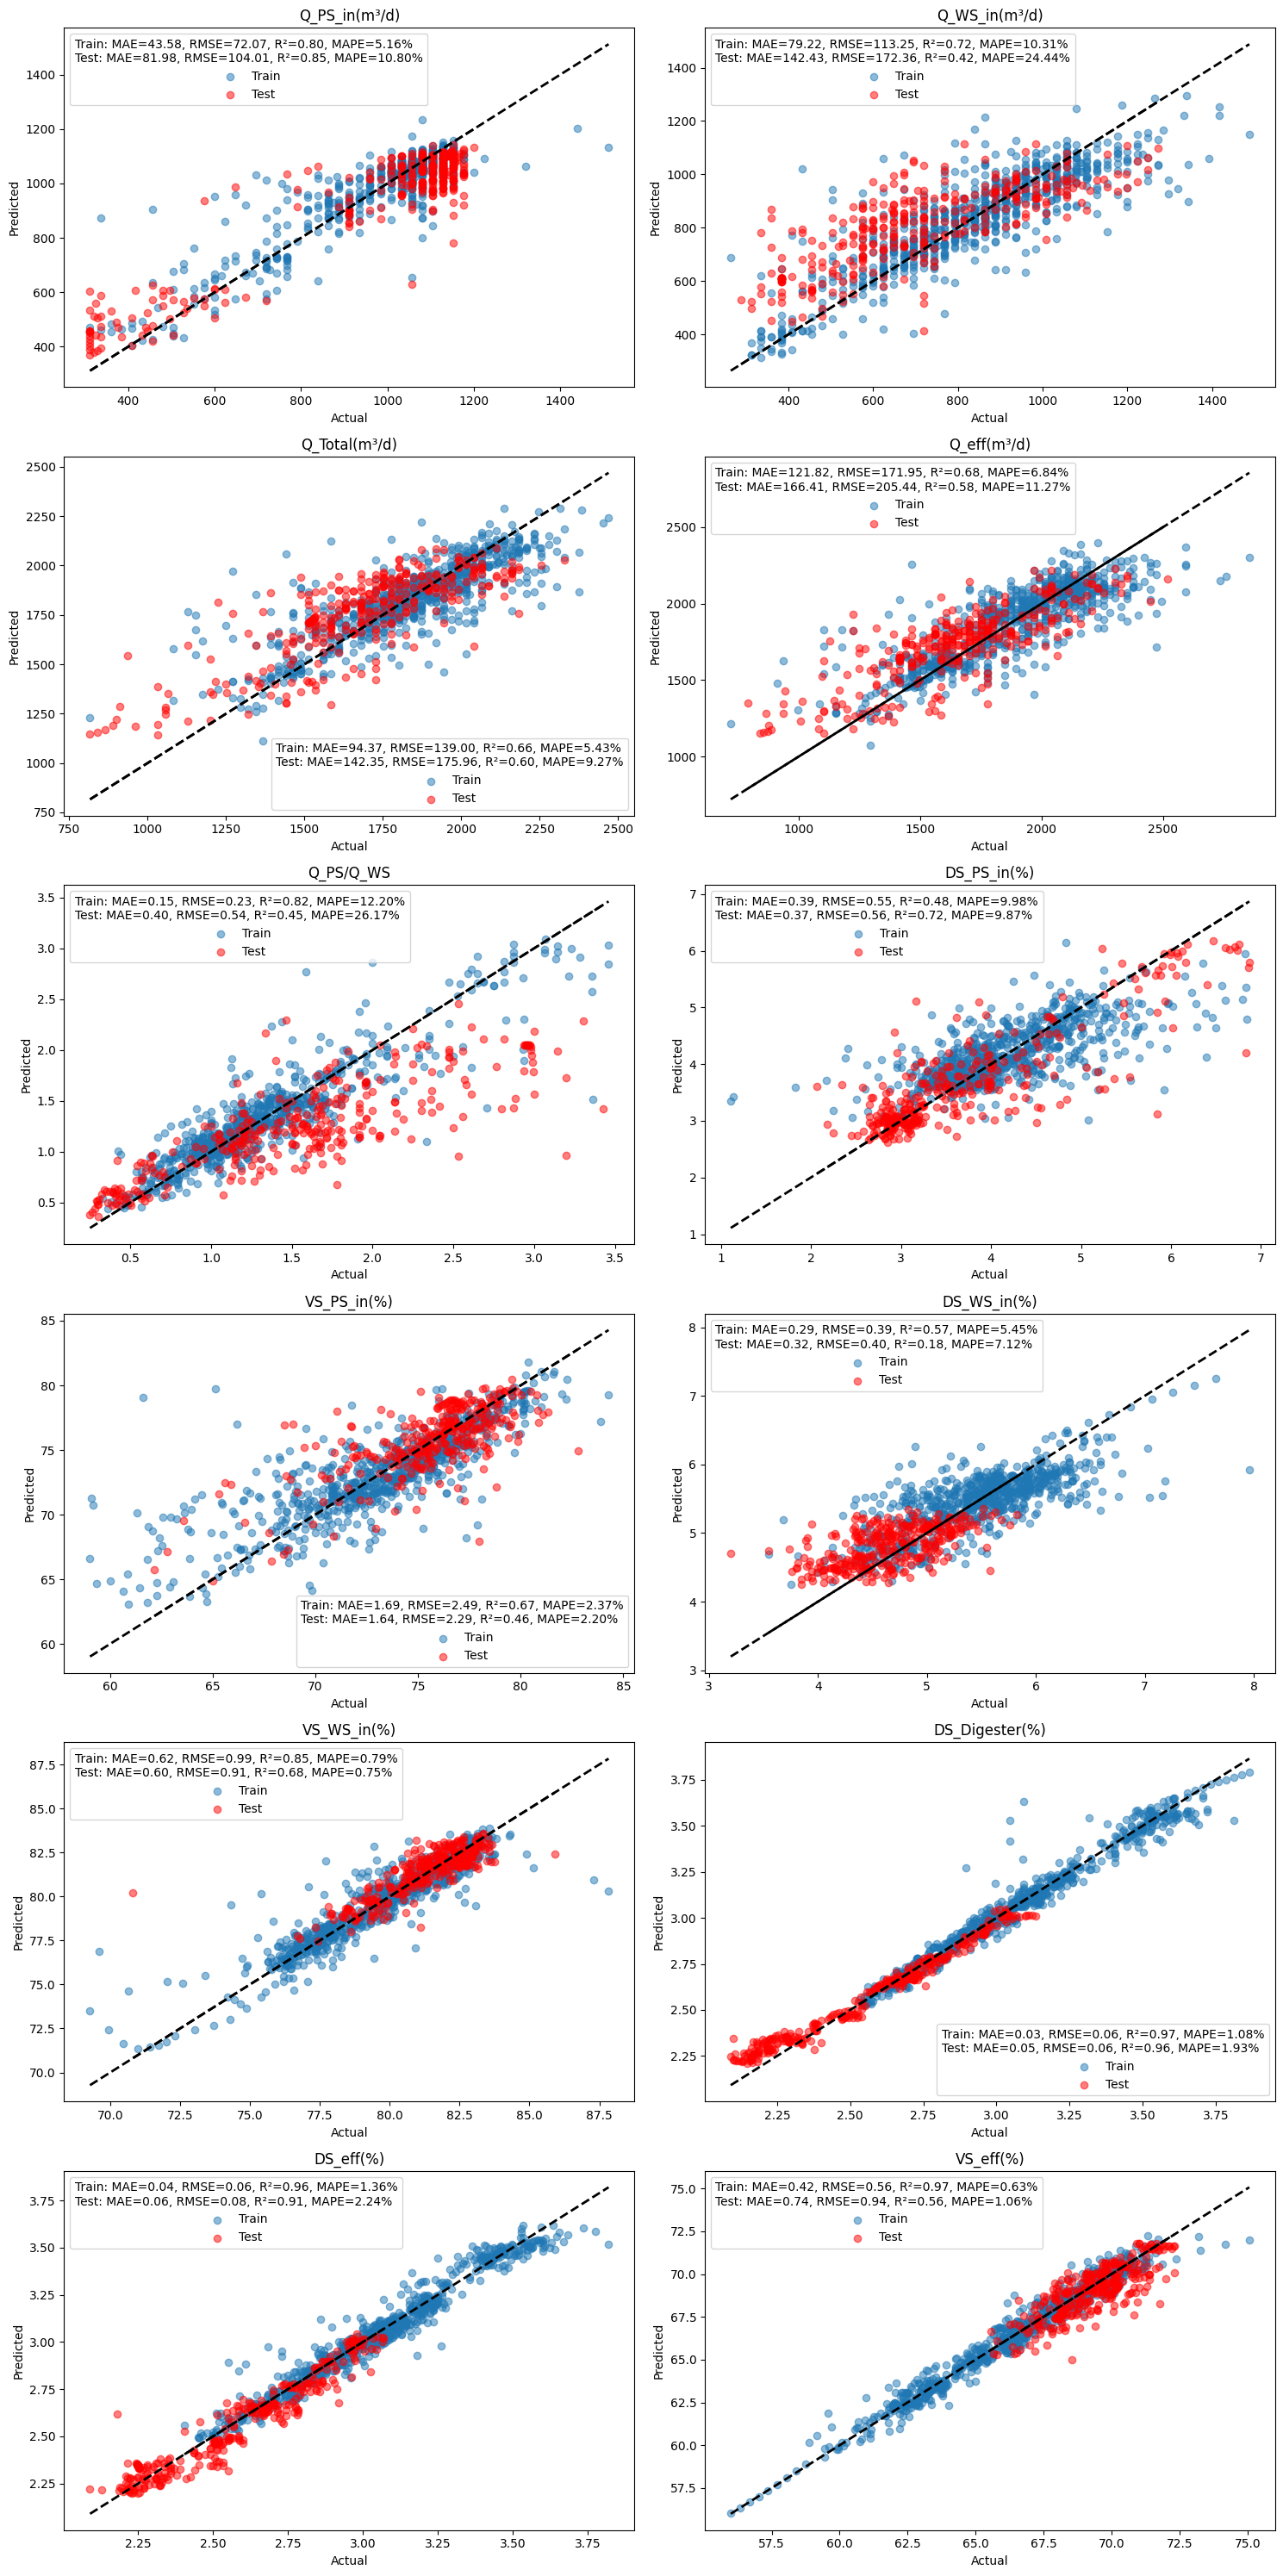

In [71]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Create a single figure with subplots for regression plots
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for i in range(num_columns):
    actual_train = y_train[:, :, i].flatten()  # Actual training data for feature i
    predicted_train = pred_e1d1_train[:, :, i].flatten()  # Predicted training data for feature i

    actual_test = y_test[:, :, i].flatten()  # Actual test data for feature i
    predicted_test = pred_e1d1[:, :, i].flatten()  # Predicted test data for feature i

    # Calculate metrics for train data
    mae_train = mean_absolute_error(actual_train, predicted_train)
    rmse_train = np.sqrt(mean_squared_error(actual_train, predicted_train))
    r2_train = r2_score(actual_train, predicted_train)
    mape_train = mean_absolute_percentage_error(actual_train, predicted_train)

    # Calculate metrics for test data
    mae_test = mean_absolute_error(actual_test, predicted_test)
    rmse_test = np.sqrt(mean_squared_error(actual_test, predicted_test))
    r2_test = r2_score(actual_test, predicted_test)
    mape_test = mean_absolute_percentage_error(actual_test, predicted_test)

    # Plot regression for training data
    axes[i].scatter(actual_train, predicted_train, label='Train', alpha=0.5)
    # Plot regression line for training data
    axes[i].plot([actual_train.min(), actual_train.max()], [actual_train.min(), actual_train.max()], 'k--', lw=2)

    # Plot regression for test data
    axes[i].scatter(actual_test, predicted_test, label='Test', alpha=0.5, color='red')
    # Plot regression line for test data
    axes[i].plot([actual_test.min(), actual_test.max()], [actual_test.min(), actual_test.max()], 'k--', lw=2)

    # Add titles and labels
    axes[i].set_title(df_LSTM.columns[i])  # Set title to the column name
    axes[i].set_xlabel('Actual')
    axes[i].set_ylabel('Predicted')
    axes[i].legend(title=f'Train: MAE={mae_train:.2f}, RMSE={rmse_train:.2f}, R²={r2_train:.2f}, MAPE={mape_train:.2f}%\n'
                         f'Test: MAE={mae_test:.2f}, RMSE={rmse_test:.2f}, R²={r2_test:.2f}, MAPE={mape_test:.2f}%')


# Remove any empty subplots
for j in range(num_columns, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

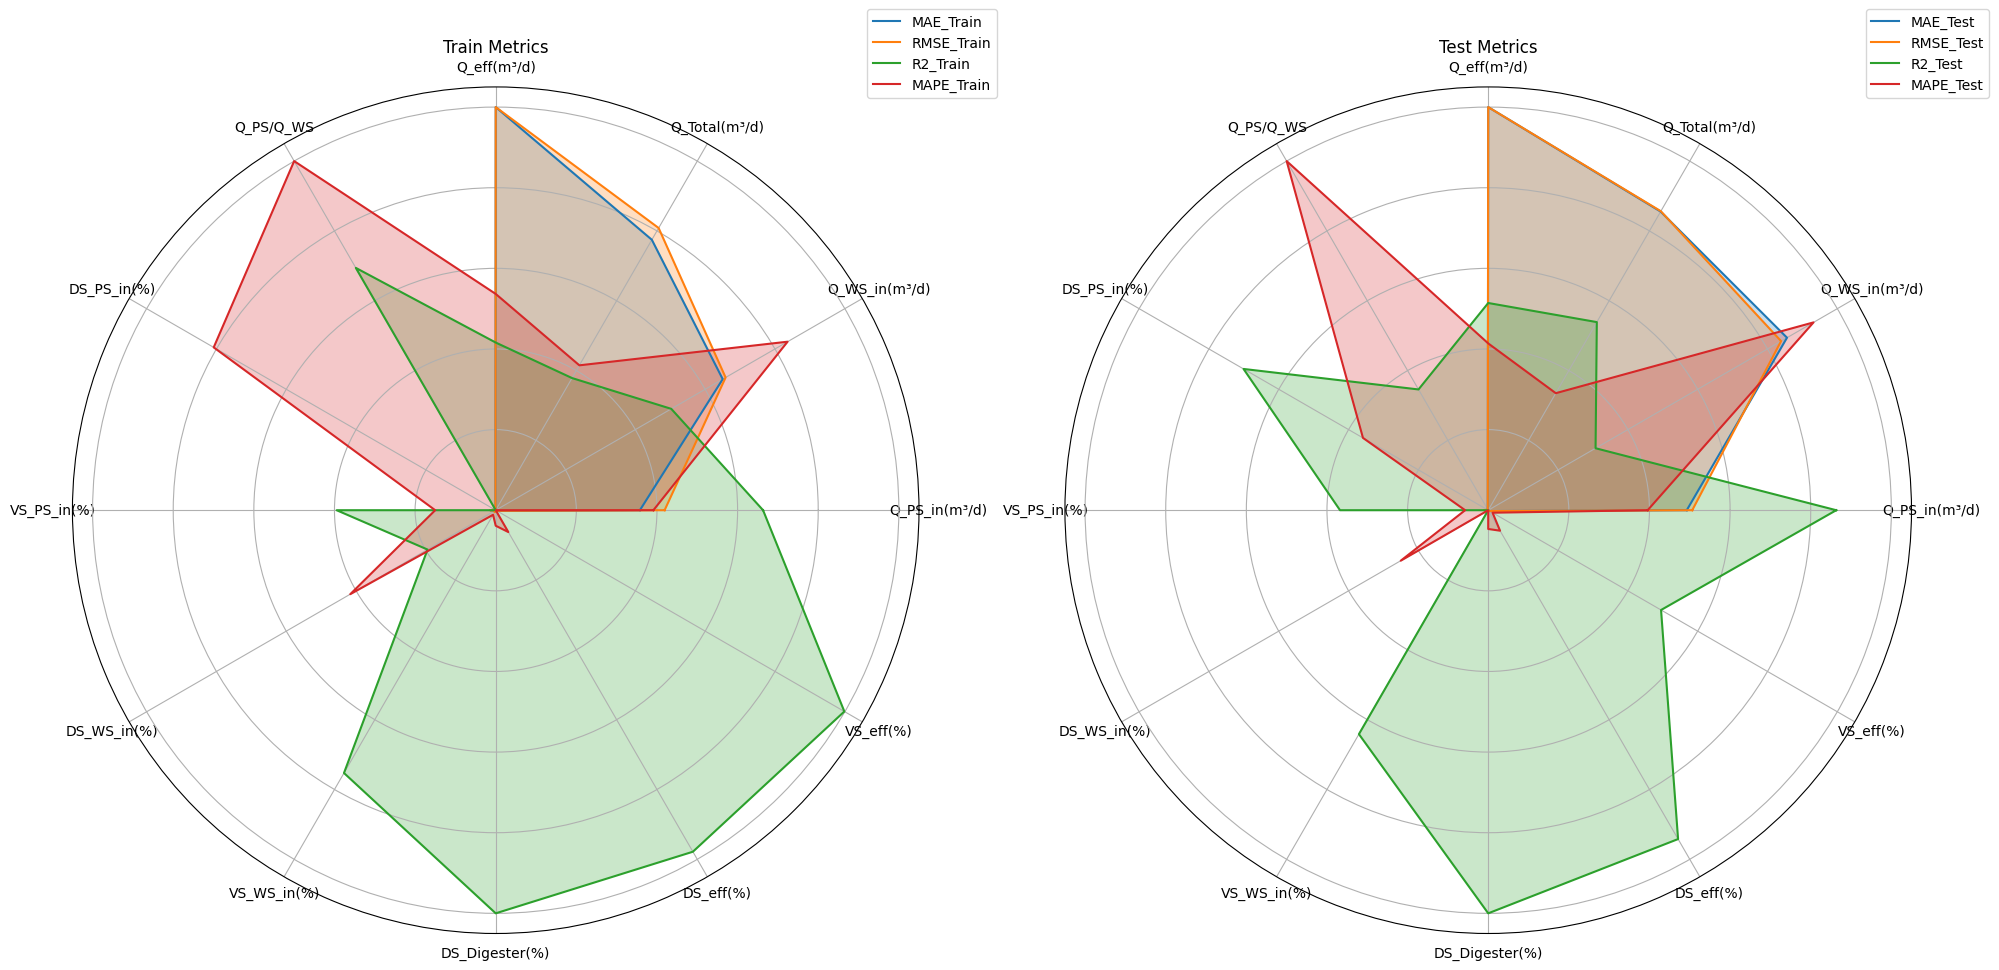

In [74]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate metrics for each feature
metrics = {
    'MAE_Train': [],
    'RMSE_Train': [],
    'R2_Train': [],
    'MAPE_Train': [],
    'MAE_Test': [],
    'RMSE_Test': [],
    'R2_Test': [],
    'MAPE_Test': []
}

for i in range(len(df_LSTM.columns)):
    actual_train = y_train[:, :, i].flatten()  # Actual training data for feature i
    predicted_train = pred_e1d1_train[:, :, i].flatten()  # Predicted training data for feature i

    actual_test = y_test[:, :, i].flatten()  # Actual test data for feature i
    predicted_test = pred_e1d1[:, :, i].flatten()  # Predicted test data for feature i

    # Calculate metrics for test data
    metrics['MAE_Test'].append(mean_absolute_error(actual_test, predicted_test))
    metrics['RMSE_Test'].append(np.sqrt(mean_squared_error(actual_test, predicted_test)))
    metrics['R2_Test'].append(r2_score(actual_test, predicted_test))
    metrics['MAPE_Test'].append(mean_absolute_percentage_error(actual_test, predicted_test))

    # Calculate metrics for train data
    metrics['MAE_Train'].append(mean_absolute_error(actual_train, predicted_train))
    metrics['RMSE_Train'].append(np.sqrt(mean_squared_error(actual_train, predicted_train)))
    metrics['R2_Train'].append(r2_score(actual_train, predicted_train))
    metrics['MAPE_Train'].append(mean_absolute_percentage_error(actual_train, predicted_train))

# Create a spider chart for train metrics
labels = list(df_LSTM.columns)
num_vars = len(labels)

# Create a 2D array of train metrics
train_metrics_array = np.array([
    metrics['MAE_Train'],
    metrics['RMSE_Train'],
    metrics['R2_Train'],
    metrics['MAPE_Train']
])

# Normalize the train metrics for better visualization
train_metrics_array = (train_metrics_array - train_metrics_array.min(axis=1, keepdims=True)) / (train_metrics_array.max(axis=1, keepdims=True) - train_metrics_array.min(axis=1, keepdims=True))

# Create a 2D array of test metrics
test_metrics_array = np.array([
    metrics['MAE_Test'],
    metrics['RMSE_Test'],
    metrics['R2_Test'],
    metrics['MAPE_Test']
])

# Normalize the test metrics for better visualization
test_metrics_array = (test_metrics_array - test_metrics_array.min(axis=1, keepdims=True)) / (test_metrics_array.max(axis=1, keepdims=True) - test_metrics_array.min(axis=1, keepdims=True))

# Create a single figure with two subplots for radar charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10), subplot_kw=dict(polar=True))

# Define the angles for the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the loop

# Plot each train metric
for i, metric in enumerate(train_metrics_array):
    data = metric.tolist()
    data += data[:1]
    ax1.plot(angles, data, label=list(metrics.keys())[i])
    ax1.fill(angles, data, alpha=0.25)

# Add labels for train metrics
ax1.set_yticklabels([])
ax1.set_xticks(angles[:-1])
ax1.set_xticklabels(labels)
ax1.set_title('Train Metrics')
ax1.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

# Plot each test metric
for i, metric in enumerate(test_metrics_array):
    data = metric.tolist()
    data += data[:1]
    ax2.plot(angles, data, label=list(metrics.keys())[i + 4])  # Offset by 4 to get the correct labels
    ax2.fill(angles, data, alpha=0.25)

# Add labels for test metrics
ax2.set_yticklabels([])
ax2.set_xticks(angles[:-1])
ax2.set_xticklabels(labels)
ax2.set_title('Test Metrics')
ax2.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

# Show the plot
plt.tight_layout()
plt.show()

## Save LSTM model

In [75]:
# Save the entire model to a HDF5 file
model_e1d1.save('lstm_model.h5')

# Save the scalers
import joblib
joblib.dump(scalers, 'scalers.pkl')

# To load the model and scalers later, you can use:
# from tensorflow.keras.models import load_model
# import joblib
# model = load_model('lstm_model.h5')
# scalers = joblib.load('scalers.pkl')

In [78]:


# Load the saved model
from tensorflow.keras.models import load_model
model_e1d1 = load_model('lstm_model.h5')
scalers = joblib.load('scalers.pkl')

# Prepare the data for prediction
n_past = 7  # Number of past days to use for prediction
n_features = len(df_LSTM.columns)

# Select the first n_past days from df_LSTM for prediction
first_n_days = df_LSTM[:n_past].values.reshape((1, n_past, n_features))

# Make a prediction
predicted_values = model_e1d1.predict(first_n_days)

# Inverse transform the predicted values if necessary
for index, column in enumerate(df_LSTM.columns):
    scaler = scalers['scaler_' + column]
    predicted_values[:, :, index] = scaler.inverse_transform(predicted_values[:, :, index])

# Create DataFrame for input data
input_df = pd.DataFrame(first_n_days[0], columns=df_LSTM.columns)
input_df.index = df_LSTM.index[:n_past]

# Create DataFrame for predicted output data
predicted_df = pd.DataFrame(predicted_values[0], columns=df_LSTM.columns)
predicted_df.index = [df_LSTM.index[n_past]]

# Get the actual 8th day data from df_LSTM
actual_8th_day_df = df_LSTM.iloc[n_past:n_past+1]

# Print the input, predicted, and actual 8th day DataFrames
print("Input DataFrame:")
print(input_df)
print("\nPredicted DataFrame:")
print(predicted_df)
print("\nActual 8th Day DataFrame:")
print(actual_8th_day_df)

1/1 [==============================] - 1s 967ms/step
Input DataFrame:
            Q_PS_in(m³/d)  Q_WS_in(m³/d)  Q_Total(m³/d)  Q_eff(m³/d)  \
DATE                                                                   
2014-01-01        1116.00         744.00        1860.00      1356.00   
2014-01-02        1112.00         760.00        1872.00      1368.00   
2014-01-03        1108.00         776.00        1884.00      1380.00   
2014-01-04        1104.00         792.00        1896.00      1392.00   
2014-01-05        1100.00         808.00        1908.00      1404.00   
2014-01-06        1096.00         824.00        1920.00      1416.00   
2014-01-07        1092.00         840.00        1932.00      1428.00   

            Q_PS/Q_WS  DS_PS_in(%)  VS_PS_in(%)  DS_WS_in(%)  VS_WS_in(%)  \
DATE                                                                        
2014-01-01       1.43         2.72        72.48         9.02        77.47   
2014-01-02       1.41         2.85        72.63   

# XGboost Model (Biogas)

## Load Dataset

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import ParameterGrid  
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

import xgboost as xgb

In [26]:
df_xgb= df_xgb
df_xgb.head()
index_list = list(df_xgb.index)

In [27]:
headers_list = list(df_xgb.columns)
headers_list

['Q_PS_in(m³/d)',
 'Q_WS_in(m³/d)',
 'Q_Total(m³/d)',
 'Q_eff(m³/d)',
 'Q_PS/Q_WS',
 'DS_PS_in(%)',
 'VS_PS_in(%)',
 'DS_WS_in(%)',
 'VS_WS_in(%)',
 'DS_Digester(%)',
 'DS_eff(%)',
 'VS_eff(%)',
 'ALK(mg CaCO3/L)',
 'FA(mg/L)',
 'pH',
 'T(°C)',
 'Q_Biogas(Nm³/d)']

In [28]:
# Prepare the data for XGBoost model
X_xgb = df_xgb[['Q_PS_in(m³/d)',
                'Q_WS_in(m³/d)',
                'Q_Total(m³/d)',
                'Q_eff(m³/d)',
                'Q_PS/Q_WS',
                'DS_PS_in(%)',
                'VS_PS_in(%)',
                'DS_WS_in(%)',
                'VS_WS_in(%)',
                'DS_Digester(%)',
                'DS_eff(%)',
                'VS_eff(%)',
                'ALK(mg CaCO3/L)',
                'FA(mg/L)',
                'pH',
                'T(°C)']]  

y_xgb = df['Q_Biogas(Nm³/d)']  # Target variable for XGBoost

# Split the data into train and test sets for XGBoost model
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_xgb, y_xgb, test_size=0.2, random_state=42)

 ## Model Xgboost

In [29]:
# Initialize the XGBoost regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

# Define the parameter grid
param_grid = {
    'colsample_bytree': [0.3, 0.7],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'alpha': [5, 10],
    'n_estimators': [50, 100]
}

# Setup the grid search
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=10,
                               scoring='neg_mean_squared_error', verbose=1)

# Perform the grid search
grid_search_xgb.fit(X_train_xgb, y_train_xgb)

# Best model
best_model_xgb = grid_search_xgb.best_estimator_

# Predictions using the best model
y_pred_xgb = best_model_xgb.predict(X_test_xgb)

# Evaluate the best model
rmse_xgb = np.sqrt(mean_squared_error(y_test_xgb, y_pred_xgb))
print(f"Optimal RMSE: {rmse_xgb}")
print(f"Best parameters: {grid_search_xgb.best_params_}")

Fitting 10 folds for each of 32 candidates, totalling 320 fits
Optimal RMSE: 3470.833987236871
Best parameters: {'alpha': 10, 'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


## Visualize the results

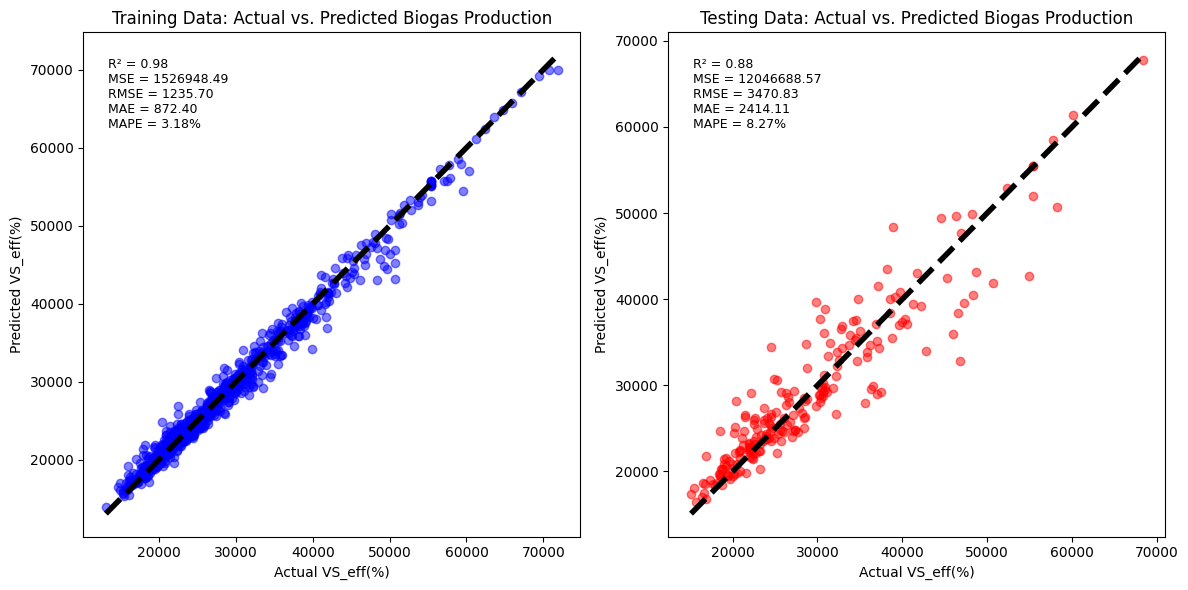

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Predictions for both train and test sets
y_train_pred_xgb = best_model_xgb.predict(X_train_xgb)
y_test_pred_xgb = best_model_xgb.predict(X_test_xgb)

# Calculate R2 scores
r2_train_xgb = r2_score(y_train_xgb, y_train_pred_xgb)
r2_test_xgb = r2_score(y_test_xgb, y_test_pred_xgb)

# Calculate MSE
mse_train_xgb = mean_squared_error(y_train_xgb, y_train_pred_xgb)
mse_test_xgb = mean_squared_error(y_test_xgb, y_test_pred_xgb)

# Calculate RMSE
rmse_train_xgb = np.sqrt(mse_train_xgb)
rmse_test_xgb = np.sqrt(mse_test_xgb)

# Calculate MAE
mae_train_xgb = mean_absolute_error(y_train_xgb, y_train_pred_xgb)
mae_test_xgb = mean_absolute_error(y_test_xgb, y_test_pred_xgb)

# Calculate MAPE
mape_train_xgb = mean_absolute_percentage_error(y_train_xgb, y_train_pred_xgb)
mape_test_xgb = mean_absolute_percentage_error(y_test_xgb, y_test_pred_xgb)

# Create a single figure with two subplots side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot for training data
axes[0].scatter(y_train_xgb, y_train_pred_xgb, alpha=0.5, color='blue')
axes[0].set_title('Training Data: Actual vs. Predicted Biogas Production')
axes[0].set_xlabel('Actual VS_eff(%)')
axes[0].set_ylabel('Predicted VS_eff(%)')
axes[0].plot([y_train_xgb.min(), y_train_xgb.max()], [y_train_xgb.min(), y_train_xgb.max()], 'k--', lw=4)
metrics_text_train = f'R² = {r2_train_xgb:.2f}\nMSE = {mse_train_xgb:.2f}\nRMSE = {rmse_train_xgb:.2f}\nMAE = {mae_train_xgb:.2f}\nMAPE = {mape_train_xgb:.2f}%'
axes[0].text(0.05, 0.95, metrics_text_train, transform=axes[0].transAxes, fontsize=9, verticalalignment='top')

# Plot for testing data
axes[1].scatter(y_test_xgb, y_test_pred_xgb, alpha=0.5, color='red')
axes[1].set_title('Testing Data: Actual vs. Predicted Biogas Production')
axes[1].set_xlabel('Actual VS_eff(%)')
axes[1].set_ylabel('Predicted VS_eff(%)')
axes[1].plot([y_test_xgb.min(), y_test_xgb.max()], [y_test_xgb.min(), y_test_xgb.max()], 'k--', lw=4)
metrics_text_test = f'R² = {r2_test_xgb:.2f}\nMSE = {mse_test_xgb:.2f}\nRMSE = {rmse_test_xgb:.2f}\nMAE = {mae_test_xgb:.2f}\nMAPE = {mape_test_xgb:.2f}%'
axes[1].text(0.05, 0.95, metrics_text_test, transform=axes[1].transAxes, fontsize=9, verticalalignment='top')

# Adjust layout
plt.tight_layout()
plt.show()

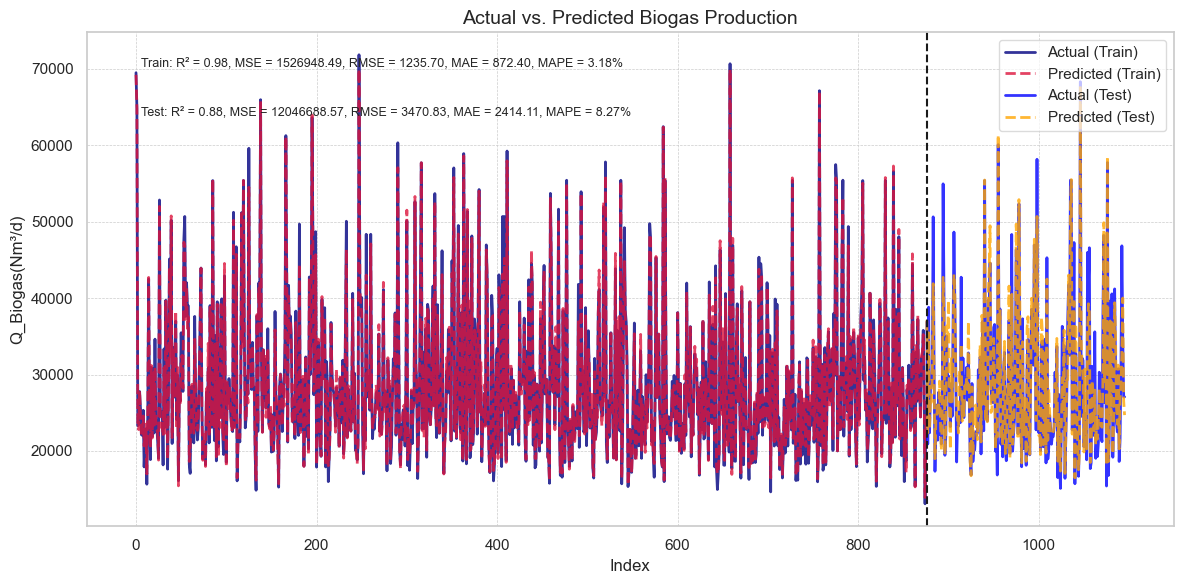

In [31]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Set the style of seaborn for more beautiful plots
sns.set(style="whitegrid")

# Function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Predictions for both train and test sets
y_train_pred_xgb = best_model_xgb.predict(X_train_xgb)
y_test_pred_xgb = best_model_xgb.predict(X_test_xgb)

# Calculate R2 scores
r2_train_xgb = r2_score(y_train_xgb, y_train_pred_xgb)
r2_test_xgb = r2_score(y_test_xgb, y_test_pred_xgb)

# Calculate MSE
mse_train_xgb = mean_squared_error(y_train_xgb, y_train_pred_xgb)
mse_test_xgb = mean_squared_error(y_test_xgb, y_test_pred_xgb)

# Calculate RMSE
rmse_train_xgb = np.sqrt(mse_train_xgb)
rmse_test_xgb = np.sqrt(mse_test_xgb)

# Calculate MAE
mae_train_xgb = mean_absolute_error(y_train_xgb, y_train_pred_xgb)
mae_test_xgb = mean_absolute_error(y_test_xgb, y_test_pred_xgb)

# Calculate MAPE
mape_train_xgb = mean_absolute_percentage_error(y_train_xgb, y_train_pred_xgb)
mape_test_xgb = mean_absolute_percentage_error(y_test_xgb, y_test_pred_xgb)

# Create a single figure
fig, ax = plt.subplots(figsize=(12, 6))

# Plot for training data
ax.plot(y_train_xgb.reset_index(drop=True), label='Actual (Train)', color='navy', linewidth=2, alpha=0.8)
ax.plot(y_train_pred_xgb, label='Predicted (Train)', color='crimson', linestyle='--', linewidth=2, alpha=0.8)

# Plot for testing data
ax.plot(range(len(y_train_xgb), len(y_train_xgb) + len(y_test_xgb)), y_test_xgb.reset_index(drop=True), label='Actual (Test)', color='blue', linewidth=2, alpha=0.8)
ax.plot(range(len(y_train_xgb), len(y_train_xgb) + len(y_test_xgb)), y_test_pred_xgb, label='Predicted (Test)', color='orange', linestyle='--', linewidth=2, alpha=0.8)

# Add a vertical line to separate train and test data
ax.axvline(x=len(y_train_xgb), color='k', linestyle='--')

# Add titles and labels
ax.set_title('Actual vs. Predicted Biogas Production', fontsize=14)
ax.set_xlabel('Index', fontsize=12)
ax.set_ylabel('Q_Biogas(Nm³/d)', fontsize=12)
ax.legend(frameon=True, framealpha=0.7, fancybox=True)
ax.grid(True, linestyle='--', linewidth=0.5)

# Add metrics text
metrics_text_train = f'Train: R² = {r2_train_xgb:.2f}, MSE = {mse_train_xgb:.2f}, RMSE = {rmse_train_xgb:.2f}, MAE = {mae_train_xgb:.2f}, MAPE = {mape_train_xgb:.2f}%'
metrics_text_test = f'Test: R² = {r2_test_xgb:.2f}, MSE = {mse_test_xgb:.2f}, RMSE = {rmse_test_xgb:.2f}, MAE = {mae_test_xgb:.2f}, MAPE = {mape_test_xgb:.2f}%'
ax.text(0.05, 0.95, metrics_text_train, transform=ax.transAxes, fontsize=9, verticalalignment='top')
ax.text(0.05, 0.85, metrics_text_test, transform=ax.transAxes, fontsize=9, verticalalignment='top')

# Adjust layout
plt.tight_layout()
plt.show()

## Jackknife Analysis

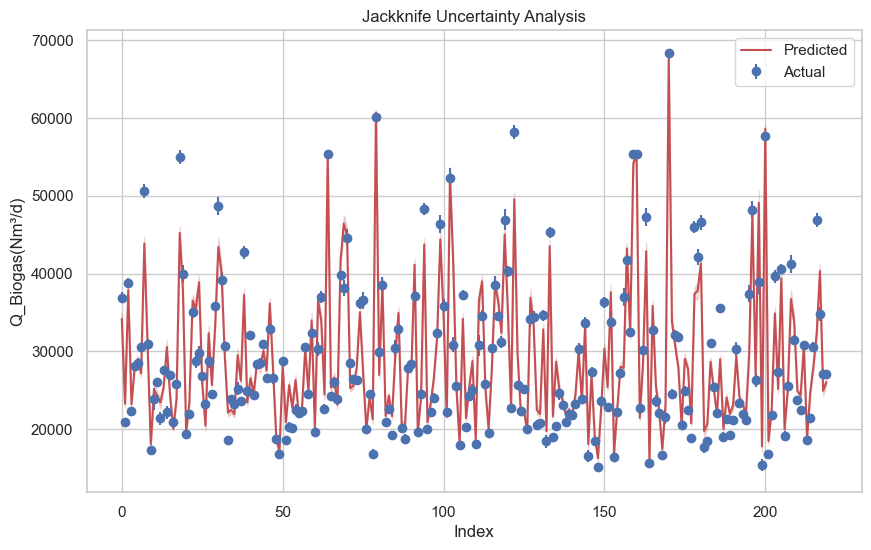

In [ ]:
from sklearn.utils import resample

# Initialize arrays to store jackknife predictions
jackknife_preds = np.zeros((X_test.shape[0], X_train.shape[0]))

# Perform jackknife resampling
for i in range(X_train.shape[0]):
    # Create the jackknife sample by excluding the i-th observation
    X_train_jackknife = X_train.drop(X_train.index[i])
    y_train_jackknife = y_train.drop(y_train.index[i])
    
    # Train the model on the jackknife sample
    xgb_model_jackknife = xgb.XGBRegressor(objective='reg:squarederror', **grid_search.best_params_)
    xgb_model_jackknife.fit(X_train_jackknife, y_train_jackknife)
    
    # Predict the test set
    jackknife_preds[:, i] = xgb_model_jackknife.predict(X_test)

# Calculate the mean and standard deviation of the jackknife predictions
jackknife_mean = np.mean(jackknife_preds, axis=1)
jackknife_std = np.std(jackknife_preds, axis=1)



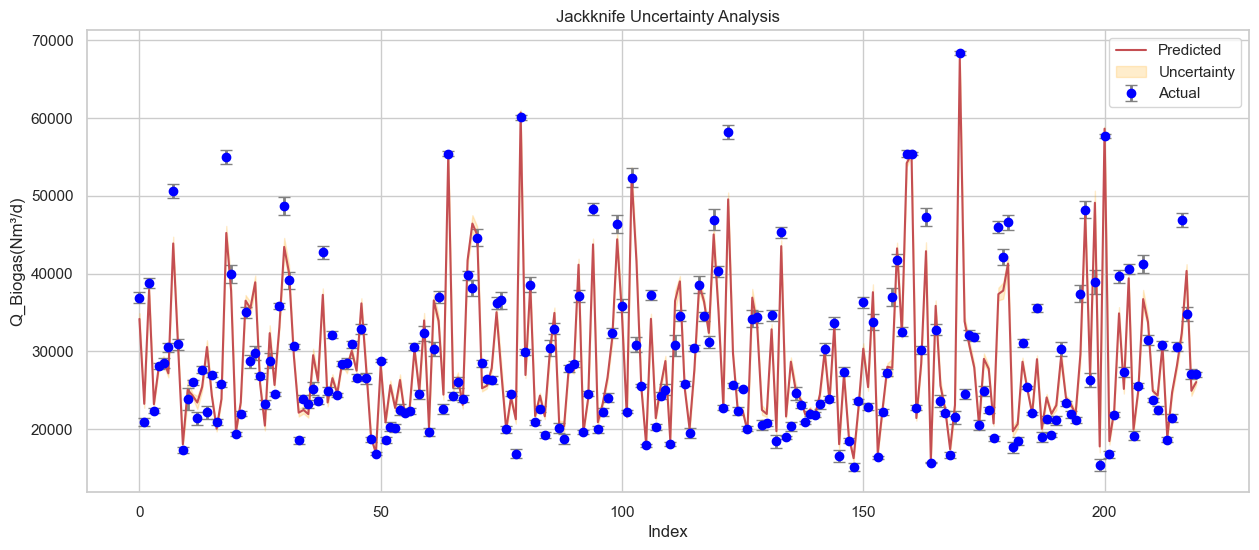

In [ ]:
# Plot the jackknife uncertainty
plt.figure(figsize=(15, 6))

# Plot actual values with error bars
plt.errorbar(range(len(y_test)), y_test, yerr=jackknife_std, fmt='o', label='Actual', color='blue', ecolor='gray', elinewidth=2, capsize=4)

# Plot predicted values
plt.plot(range(len(y_test)), jackknife_mean, 'r-', label='Predicted')

# Fill the area between jackknife_mean - jackknife_std and jackknife_mean + jackknife_std
plt.fill_between(range(len(y_test)), jackknife_mean - jackknife_std, jackknife_mean + jackknife_std, color='orange', alpha=0.2, label='Uncertainty')

plt.title('Jackknife Uncertainty Analysis')
plt.xlabel('Index')
plt.ylabel('Q_Biogas(Nm³/d)')
plt.legend()
plt.show()

## Save Xgboost model

In [32]:
import joblib

# Save the best XGBoost model
joblib.dump(best_model_xgb, 'xgb_model.pkl')

['xgb_model.pkl']

In [ ]:

# Load the saved XGBoost model
# xgb_model = joblib.load('xgb_model.pkl')


# Optimization Model

In [ ]:
import numpy as np
import pandas as pd
import joblib
import pyswarms as ps
import matplotlib.pyplot as plt

In [11]:

# Load the saved model
from tensorflow.keras.models import load_model
model_e1d1 = load_model('lstm_model.h5')

# Prepare the data for prediction
n_past = 7  # Number of past days to use for prediction
n_features = len(df_LSTM.columns)

# Select the first n_past days from df_LSTM for prediction
first_n_days = df_LSTM[:n_past].values.reshape((1, n_past, n_features))

# Make a prediction
predicted_values = model_e1d1.predict(first_n_days)

# Inverse transform the predicted values if necessary
for index, column in enumerate(df_LSTM.columns):
    scaler = scalers['scaler_' + column]
    predicted_values[:, :, index] = scaler.inverse_transform(predicted_values[:, :, index])

# Create DataFrame for predicted output data
predicted_df = pd.DataFrame(predicted_values[0], columns=df_LSTM.columns)
predicted_df.index = [df_LSTM.index[n_past]]

predicted_df


1/1 [==============================] - 1s 1s/step


Q_PS_in(m³/d)  Q_WS_in(m³/d)  Q_Total(m³/d)  Q_eff(m³/d)  \
2014-01-08        1417.04        1792.05        2731.74      3165.30   

            Q_PS/Q_WS  DS_PS_in(%)  VS_PS_in(%)  DS_WS_in(%)  VS_WS_in(%)  \
2014-01-08       0.74         3.49        90.68         4.11        69.15   

            DS_Digester(%)  DS_eff(%)  VS_eff(%)  
2014-01-08            3.69       2.71      63.64

In [33]:
import joblib

# Load the model from the file
xgb_model = joblib.load('xgb_model.pkl')

In [14]:
Operational_var = ['Operational']
df_op_var = filter_df_by_category(df, Operational_var)
df_op_var

ALK(mg CaCO3/L)  FA(mg/L)   pH  T(°C)
2014-01-01         21345.40   1305.60 7.20  41.83
2014-01-02         21164.53   1302.40 7.20  41.70
2014-01-03         20983.67   1299.20 7.20  41.57
2014-01-04         20802.80   1296.00 7.20  41.44
2014-01-05         20621.93   1292.80 7.20  41.31
...                     ...       ...  ...    ...
2016-12-27          8821.00    184.00 7.33  40.50
2016-12-28          8808.67    208.00 7.33  40.17
2016-12-29          8796.33    232.00 7.33  40.17
2016-12-30          8784.00    256.00 7.33  40.17
2016-12-31          8771.67    280.00 7.32  40.33

[1096 rows x 4 columns]

In [35]:
import pyswarms as ps
import numpy as np

# Extract the first 12 values from predicted_df as constants
constant_values = {i: predicted_df.iloc[0, i] for i in range(12)}
print(constant_values)

# Define the objective function to maximize the output of the model
def objective_function(features):
    # Replace certain indices with constant values
    for index, value in constant_values.items():
        features[:, index] = value
    
    prediction = xgb_model.predict(features)
    
    return -prediction

# Prepare bounds for the last 4 features
lower_bounds_var = df_op_var.min().values
upper_bounds_var = df_op_var.max().values

# Combine constant values and variable bounds
lower_bounds = np.concatenate([list(constant_values.values()), lower_bounds_var])
upper_bounds = np.concatenate([list(constant_values.values()), upper_bounds_var])

bounds = (lower_bounds, upper_bounds)
bounds

{0: 1417.0374, 1: 1792.047, 2: 2731.7422, 3: 3165.3044, 4: 0.7445748, 5: 3.4861445, 6: 90.68161, 7: 4.1108894, 8: 69.14729, 9: 3.6926255, 10: 2.71457, 11: 63.641438}


(array([1.41703735e+03, 1.79204700e+03, 2.73174219e+03, 3.16530444e+03,
        7.44574785e-01, 3.48614454e+00, 9.06816101e+01, 4.11088943e+00,
        6.91472931e+01, 3.69262552e+00, 2.71457005e+00, 6.36414375e+01,
        6.96740000e+03, 1.20000000e+02, 6.68500000e+00, 3.67333333e+01]),
 array([1.41703735e+03, 1.79204700e+03, 2.73174219e+03, 3.16530444e+03,
        7.44574785e-01, 3.48614454e+00, 9.06816101e+01, 4.11088943e+00,
        6.91472931e+01, 3.69262552e+00, 2.71457005e+00, 6.36414375e+01,
        2.13454000e+04, 1.78000000e+03, 7.97833333e+00, 4.20000000e+01]))

In [24]:
lower_bounds

array([1.41703735e+03, 1.79204700e+03, 2.73174219e+03, 3.16530444e+03,
       7.44574785e-01, 3.48614454e+00, 9.06816101e+01, 4.11088943e+00,
       6.91472931e+01, 3.69262552e+00, 2.71457005e+00, 6.36414375e+01,
       6.96740000e+03, 1.20000000e+02, 6.68500000e+00, 3.67333333e+01])

In [ ]:
upper_bounds

array([1.00000000e+00, 2.00000000e+00, 3.00000000e+00, 4.00000000e+00,
       5.00000000e+00, 6.00000000e+00, 7.00000000e+00, 8.00000000e+00,
       9.00000000e+00, 1.00000000e+01, 2.95214558e+00, 6.49215393e+01,
       1.82180000e+04, 7.97833333e+00, 4.20000000e+01, 2.85600000e+03])

In [36]:

# Initialize swarm
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
optimizer = ps.single.GlobalBestPSO(n_particles=500, dimensions=16, options=options, bounds=bounds)

# Perform optimization
cost, pos = optimizer.optimize(objective_function, iters=1500)

# Print the optimal feature values
print(f"The optimal feature values are: {pos}")

final_value = -cost
# Save the results
np.savetxt('final_value.txt', [final_value])  # Save final_value in a text file
np.savetxt('pos_values.txt', pos)  # Save pos array in a text file

2024-07-15 15:21:16,595 - pyswarms.single.global_best - INFO - Optimize for 1500 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1500/1500, best_cost=-4.88e+4
2024-07-15 15:21:24,886 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -48832.484375, best pos: [1.41703735e+03 1.79204700e+03 2.73174219e+03 3.16530444e+03
 7.44574785e-01 3.48614454e+00 9.06816101e+01 4.11088943e+00
 6.91472931e+01 3.69262552e+00 2.71457005e+00 6.36414375e+01
 1.48850320e+04 1.48803446e+03 6.78407392e+00 3.77348305e+01]


The optimal feature values are: [1.41703735e+03 1.79204700e+03 2.73174219e+03 3.16530444e+03
 7.44574785e-01 3.48614454e+00 9.06816101e+01 4.11088943e+00
 6.91472931e+01 3.69262552e+00 2.71457005e+00 6.36414375e+01
 1.48850320e+04 1.48803446e+03 6.78407392e+00 3.77348305e+01]


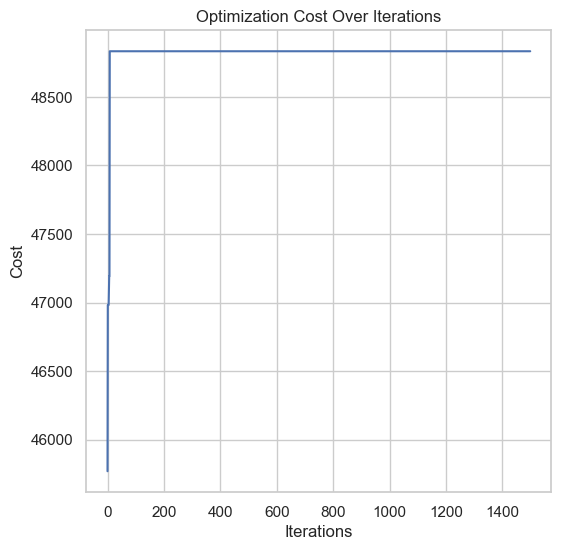

In [38]:
# Plot the cost over iterations
plt.figure(figsize=(6, 6))

plt.plot(np.abs(optimizer.cost_history))
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Optimization Cost Over Iterations')

plt.show()

# Evaluate the final optimized value
optimal_features = np.array([pos])
final_prediction = xgb_model.predict(optimal_features)


In [39]:
input_fields = ['Q_PS_in(m³/d)',
                'Q_WS_in(m³/d)',
                'Q_Total(m³/d)',
                'Q_eff(m³/d)',
                'Q_PS/Q_WS',
                'DS_PS_in(%)',
                'VS_PS_in(%)',
                'DS_WS_in(%)',
                'VS_WS_in(%)',
                'DS_Digester(%)',
                'DS_eff(%)',
                'VS_eff(%)',
                'ALK(mg CaCO3/L)',
                'FA(mg/L)',
                'pH',
                'T(°C)'
]

for field, value in zip(input_fields, pos):
    print(f"{field}: {value:.2f}")

print(f"The final optimized Biogas value is: {final_value:.2f}")

Q_PS_in(m³/d): 1417.04
Q_WS_in(m³/d): 1792.05
Q_Total(m³/d): 2731.74
Q_eff(m³/d): 3165.30
Q_PS/Q_WS: 0.74
DS_PS_in(%): 3.49
VS_PS_in(%): 90.68
DS_WS_in(%): 4.11
VS_WS_in(%): 69.15
DS_Digester(%): 3.69
DS_eff(%): 2.71
VS_eff(%): 63.64
ALK(mg CaCO3/L): 14885.03
FA(mg/L): 1488.03
pH: 6.78
T(°C): 37.73
The final optimized Biogas value is: 48832.48


In [40]:
input_fields = [
    'ALK(mg CaCO3/L)','pH','T(°C)','Q_eff(m³/d)']

for field, value in zip(input_fields, pos[12:]):
    print(f"{field}: {value:.2f}")

ALK(mg CaCO3/L): 14885.03
pH: 1488.03
T(°C): 6.78
Q_eff(m³/d): 37.73


In [41]:
# Extract the 8th biogas value from df
eighth_biogas_value = df.iloc[7]['Q_Biogas(Nm³/d)']

# Print the final optimized biogas value and the 8th biogas value
print(f"The final optimized Biogas value is: {final_value:.2f}")
print(f"The 8th Biogas value in df is: {eighth_biogas_value:.2f}")

# Compare the values
if final_value > eighth_biogas_value:
    print("The final optimized Biogas value is greater than the 8th Biogas value in df.")
elif final_value < eighth_biogas_value:
    print("The final optimized Biogas value is less than the 8th Biogas value in df.")
else:
    print("The final optimized Biogas value is equal to the 8th Biogas value in df.")

The final optimized Biogas value is: 48832.48
The 8th Biogas value in df is: 63624.00
The final optimized Biogas value is less than the 8th Biogas value in df.


In [45]:
# Initialize results list
results = []

# Iterate over each day in the dataset
for i in range(len(df) - 7):
    # Select the past 7 days for LSTM prediction
    past_7_days = df_LSTM.iloc[i:i+7].values.reshape((1, 7, len(df_LSTM.columns)))
    
    # Predict the constant values using the LSTM model
    predicted_values = model_e1d1.predict(past_7_days)
    for index, column in enumerate(df_LSTM.columns):
        scaler = scalers['scaler_' + column]
        predicted_values[:, :, index] = scaler.inverse_transform(predicted_values[:, :, index])
    
    # Extract the constant values
    constant_values = {j: predicted_values[0, 0, j] for j in range(12)}
    
    # Combine constant values and variable bounds
    lower_bounds = np.concatenate([list(constant_values.values()), lower_bounds_var])
    upper_bounds = np.concatenate([list(constant_values.values()), upper_bounds_var])
    bounds = (lower_bounds, upper_bounds)
    
    # Initialize swarm
    options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
    optimizer = ps.single.GlobalBestPSO(n_particles=500, dimensions=16, options=options, bounds=bounds)
    
    # Perform optimization with verbosity turned off
    cost, pos = optimizer.optimize(objective_function, iters=100, verbose=False)
    
    # Calculate the final optimized value
    final_value = -cost
    
    # Extract the actual biogas value for the current day
    actual_biogas_value = df.iloc[i+7]['Q_Biogas(Nm³/d)']
    
    # Calculate the difference
    difference = final_value - actual_biogas_value
    
    # Store the results
    results.append({
        'Day': df.index[i+7],
        'Final Optimized Biogas Value': final_value,
        'Actual Biogas Value': actual_biogas_value,
        'Difference': difference,
        'Comparison': 'Greater' if final_value > actual_biogas_value else 'Less' if final_value < actual_biogas_value else 'Equal'
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

1/1 [==============================] - 0s 38ms/step
            Day  Final Optimized Biogas Value  Actual Biogas Value  \
0    2014-01-08                      48832.48             63624.00   
1    2014-01-09                      50378.01             62448.00   
2    2014-01-10                      50417.67             61272.00   
3    2014-01-11                      50060.71             60096.00   
4    2014-01-12                      50240.36             58920.00   
...         ...                           ...                  ...   
1084 2016-12-27                      49261.82             39888.00   
1085 2016-12-28                      45909.23             40272.00   
1086 2016-12-29                      45909.23             37776.00   
1087 2016-12-30                      45909.23             36816.00   
1088 2016-12-31                      45909.23             37440.00   

      Difference Comparison  
0      -14791.52       Less  
1      -12069.99       Less  
2      -10854.33 

In [46]:
results_df

Day  Final Optimized Biogas Value  Actual Biogas Value  \
0    2014-01-08                      48832.48             63624.00   
1    2014-01-09                      50378.01             62448.00   
2    2014-01-10                      50417.67             61272.00   
3    2014-01-11                      50060.71             60096.00   
4    2014-01-12                      50240.36             58920.00   
...         ...                           ...                  ...   
1084 2016-12-27                      49261.82             39888.00   
1085 2016-12-28                      45909.23             40272.00   
1086 2016-12-29                      45909.23             37776.00   
1087 2016-12-30                      45909.23             36816.00   
1088 2016-12-31                      45909.23             37440.00   

      Difference Comparison  
0      -14791.52       Less  
1      -12069.99       Less  
2      -10854.33       Less  
3      -10035.29       Less  
4       -8679.64       Less  
...          ...        ...  
1084     9373.82    Greater  
1085     5637.23    Greater  
1086     8133.23    Greater  
1087     9093.23    Greater  
1088     8469.23    Greater  

[1089 rows x 5 columns]

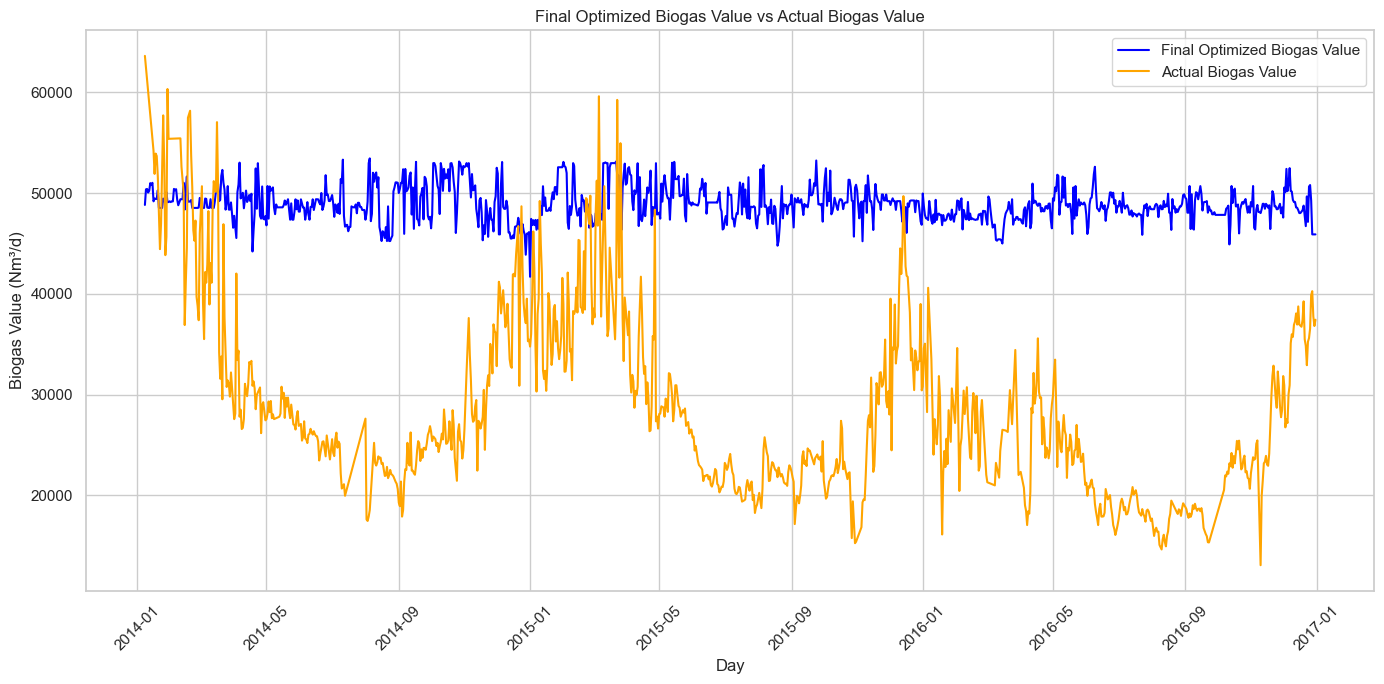

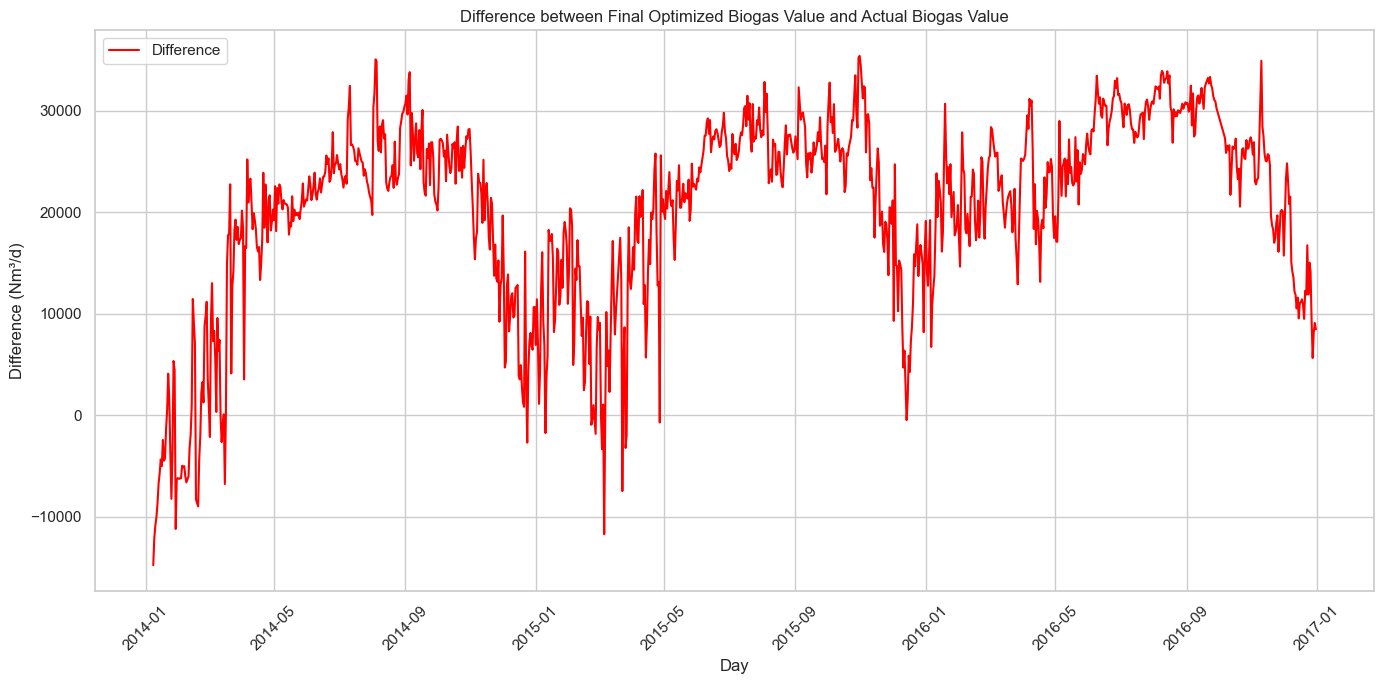

In [47]:
import matplotlib.pyplot as plt

# Plot the Final Optimized Biogas Value and Actual Biogas Value over time
plt.figure(figsize=(14, 7))

plt.plot(results_df['Day'], results_df['Final Optimized Biogas Value'], label='Final Optimized Biogas Value', color='blue')
plt.plot(results_df['Day'], results_df['Actual Biogas Value'], label='Actual Biogas Value', color='orange')

plt.xlabel('Day')
plt.ylabel('Biogas Value (Nm³/d)')
plt.title('Final Optimized Biogas Value vs Actual Biogas Value')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot the Difference over time
plt.figure(figsize=(14, 7))

plt.plot(results_df['Day'], results_df['Difference'], label='Difference', color='red')

plt.xlabel('Day')
plt.ylabel('Difference (Nm³/d)')
plt.title('Difference between Final Optimized Biogas Value and Actual Biogas Value')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()